## Importação das bibliotecas

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Etapas da atividade:

### Etapa 1: Carregamento e inspeção inicial: 

#### Carregamos os dados e verificamos as primeiras linhas, dimensões e tipos das variáveis. Isso garante que os dados foram importados corretamente e nos dá uma visão geral do dataset.

In [53]:
df_initial = pd.read_csv("./data/df_full.csv")

df = df_initial.copy()

df.head()

,Timestamp,S1_1,S1_2,S1_3,S1_4,S1_5,S1_6,S2_1,S2_2,S3_1,S3_2,S4_1,S4_2,Nivel_agua,Nivel_total
0,28/03/2022 16:30:26.57745,1524.09200,1524.68570,1530.24903,1538.64225,1552.56175,1553.28008,1530.97697,1539.25600,1544.74917,1550.44190,1545.14272,1559.75003,257.0,257.0
1,28/03/2022 16:30:27.07745,1524.09059,1524.68520,1530.24959,1538.64228,1552.56153,1553.28018,1530.97808,1539.25592,1544.75001,1550.44253,1545.14266,1559.75004,257.0,257.0
2,28/03/2022 16:30:27.57745,1524.09108,1524.68440,1530.24883,1538.64254,1552.56085,1553.28046,1530.97912,1539.25621,1544.74792,1550.44108,1545.14126,1559.75247,257.0,257.0
3,28/03/2022 16:30:28.07745,1524.09161,1524.68487,1530.24907,1538.64199,1552.56206,1553.28030,1530.97905,1539.25607,1544.74877,1550.44254,1545.14166,1559.75295,257.0,257.0
4,28/03/2022 16:30:28.57745,1524.09070,1524.68511,1530.24922,1538.64187,1552.56135,1553.27996,1530.97980,1539.25519,1544.74875,1550.44097,1545.14139,1559.74994,257.0,257.0


In [54]:
df.shape

(66540, 15)

In [55]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66540 entries, 0 to 66539
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    66540 non-null  object 
 1   S1_1         66540 non-null  float64
 2   S1_2         66540 non-null  float64
 3   S1_3         66540 non-null  float64
 4   S1_4         66540 non-null  float64
 5   S1_5         66540 non-null  float64
 6   S1_6         66540 non-null  float64
 7   S2_1         66540 non-null  float64
 8   S2_2         66540 non-null  float64
 9   S3_1         66540 non-null  float64
 10  S3_2         66540 non-null  float64
 11  S4_1         66540 non-null  float64
 12  S4_2         66540 non-null  float64
 13  Nivel_agua   66540 non-null  float64
 14  Nivel_total  66540 non-null  float64
dtypes: float64(14), object(1)
memory usage: 7.6+ MB


### Sumário

- Timestamp: Refere-se ao momento em que uma medição foi registrada.
- S1_1 a S1_6: São os nomes de um conjunto de seis sensores de temperatura baseados em Fibra com Rede de Bragg (FBG). Os valores associados a eles são as medições de comprimento de onda em nanômetros (nm).
- S2_1, S2_2, S3_1, S3_2, S4_1, S4_2: São os nomes de seis sensores de pressão hidrostática, também baseados em FBG, distribuídos em três canais (2, 3 e 4), com dois sensores por canal. Os valores representam as medições de comprimento de onda (em nm) desses sensores.
- Nivel agua: Representa a medição do nível da interface água-óleo, ou seja, a altura da camada de água no fundo do tanque, expressa em milímetros (mm).
- Nivel total: Representa a medição do nível total de líquido (água + óleo) dentro do tanque, também expressa em milímetros (mm). A camada de óleo pode ser calculada subtraindo o nível da água do nível total.

### Etapa 2: Resumo estatístico

#### Utilizamos describe() para obter estatísticas básicas (média, desvio, min, max). Isso ajuda a identificar possíveis valores fora do esperado e entender a faixa de variação dos sensores e níveis.

In [56]:
df.describe()

,S1_1,S1_2,S1_3,S1_4,S1_5,S1_6,S2_1,S2_2,S3_1,S3_2,S4_1,S4_2,Nivel_agua,Nivel_total
count,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000,66540.000000
mean,1524.134287,1524.730478,1530.291499,1538.683594,1552.585198,1553.321983,1531.088692,1539.395152,1544.837456,1550.519120,1545.308524,1558.082188,1245.555020,1596.034836
std,0.054754,0.055615,0.056080,0.065582,0.060931,0.076920,0.166813,0.158077,0.110521,0.150314,0.151640,4.585039,734.131379,745.587549
min,1523.876580,1524.632450,1530.188590,1538.571820,1552.386530,1553.097760,1530.652050,1539.029490,1544.519990,1550.201170,1545.027500,1545.204630,109.000000,109.000000
25%,1524.089350,1524.688170,1530.248818,1538.641880,1552.556660,1553.277568,1531.038010,1539.360270,1544.746688,1550.397470,1545.222540,1559.539840,791.000000,1287.000000
50%,1524.128870,1524.720210,1530.281990,1538.672615,1552.571130,1553.290640,1531.080450,1539.386375,1544.843610,1550.510815,1545.287020,1559.679345,1219.000000,1656.000000
75%,1524.160922,1524.765310,1530.314970,1538.705990,1552.584570,1553.333610,1531.185390,1539.425900,1544.924012,1550.622420,1545.383850,1559.762980,1880.000000,2188.000000
max,1524.299000,1524.905580,1530.464740,1538.917920,1552.823080,1553.571740,1531.635210,1540.003880,1545.096100,1550.912600,1545.873190,1560.415660,2804.000000,2804.000000


### Etapa 3: Valores ausentes e duplicados

#### Verificamos se há dados faltantes ou linhas duplicadas. Isso é importante para garantir a qualidade dos dados antes de qualquer análise mais profunda.

In [57]:
df.isna().sum()


Timestamp      0
S1_1           0
S1_2           0
S1_3           0
S1_4           0
S1_5           0
S1_6           0
S2_1           0
S2_2           0
S3_1           0
S3_2           0
S4_1           0
S4_2           0
Nivel_agua     0
Nivel_total    0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

### Etapa 4: Distribuição das variáveis

#### Plotamos histogramas e boxplots para cada sensor. Esses gráficos mostram a distribuição dos valores, possíveis outliers e a variabilidade de cada sensor.

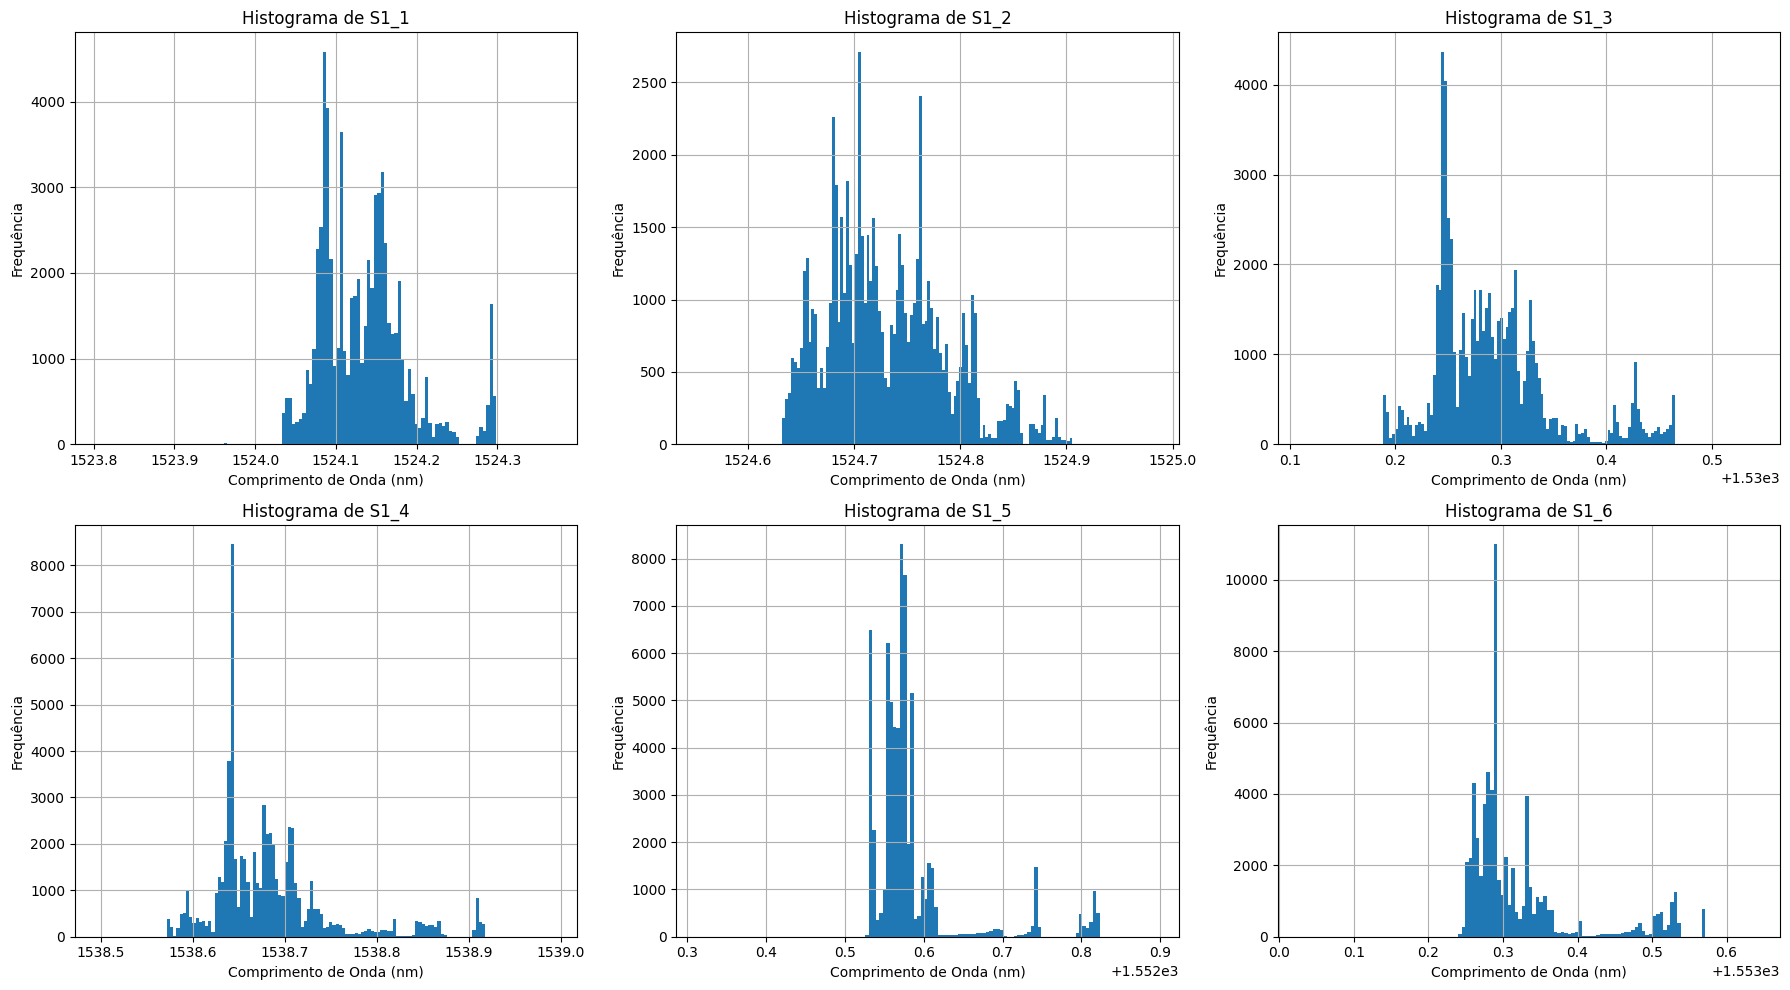

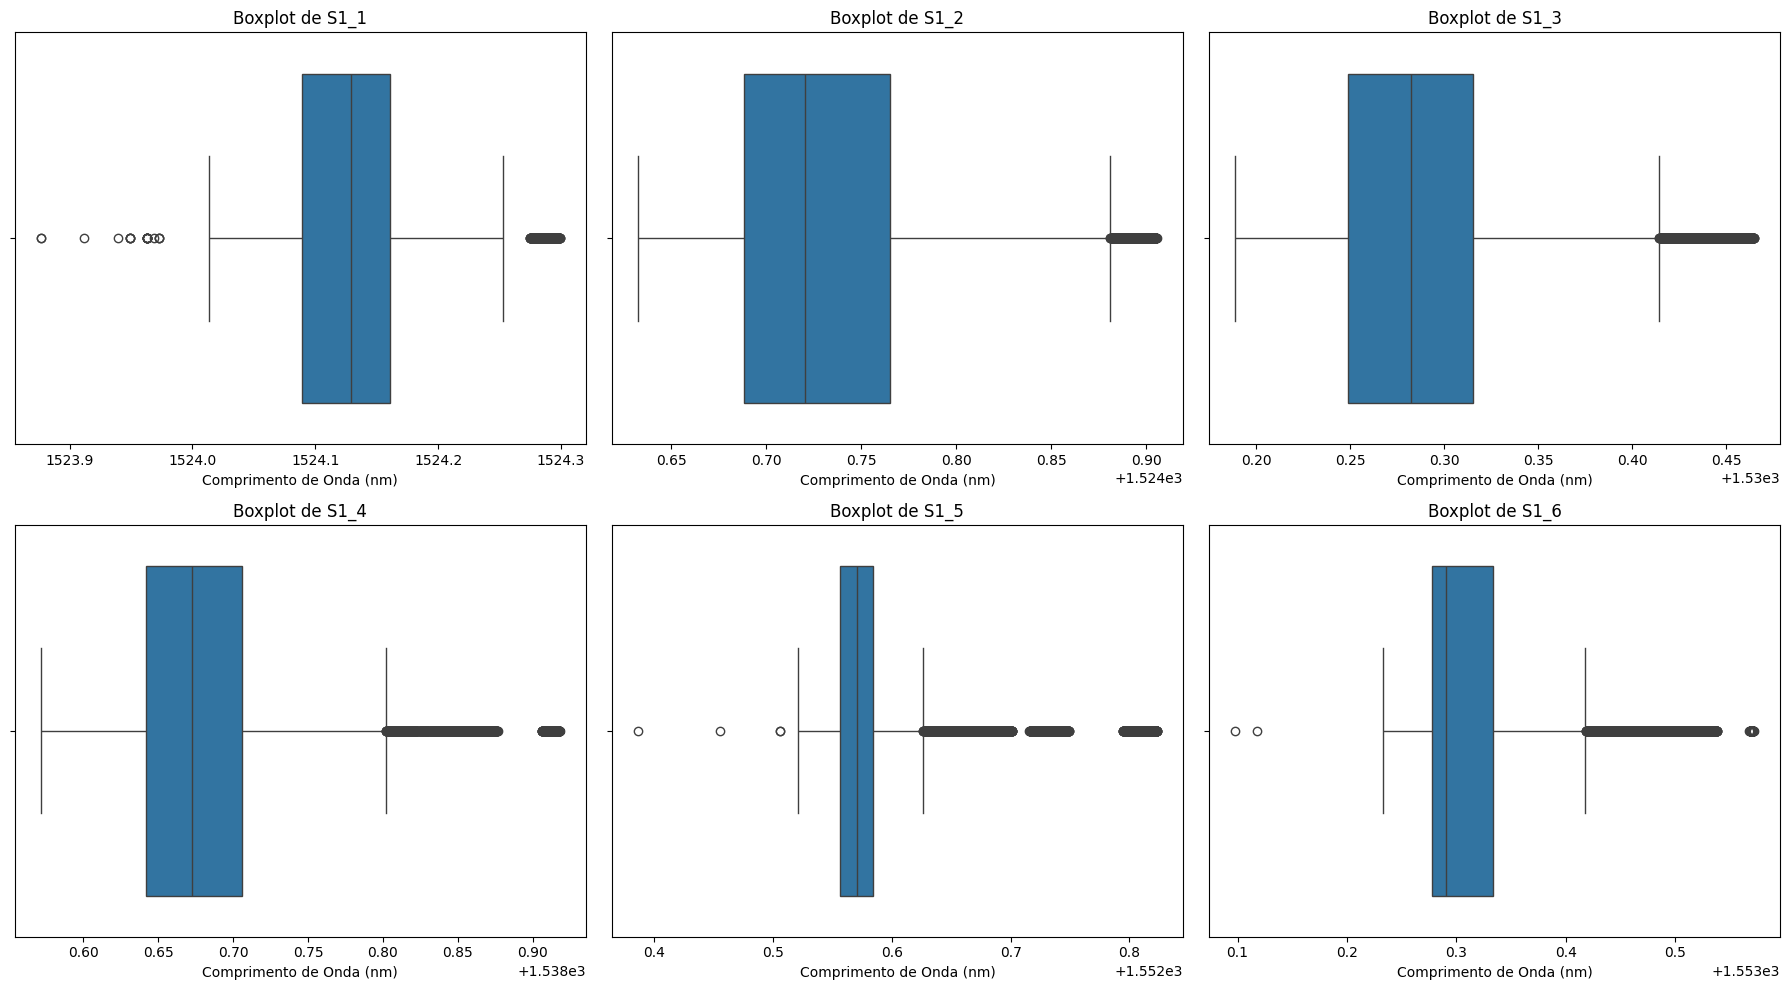

In [59]:
# Histogramas para sensores S1 (temperatura)
s1_sensors = ['S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, sensor in enumerate(s1_sensors):
    df[sensor].hist(ax=axes[i], bins=100)
    axes[i].set_title(f'Histograma de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')
    axes[i].set_ylabel('Frequência')
    axes[i].set_xlim(df[sensor].min() - 0.1, df[sensor].max() + 0.1)  # Zoom para variações pequenas

plt.tight_layout()
plt.show()

# Boxplots para sensores S1
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, sensor in enumerate(s1_sensors):
    sns.boxplot(data=df, x=sensor, ax=axes[i])
    axes[i].set_title(f'Boxplot de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')

plt.tight_layout()
plt.show()

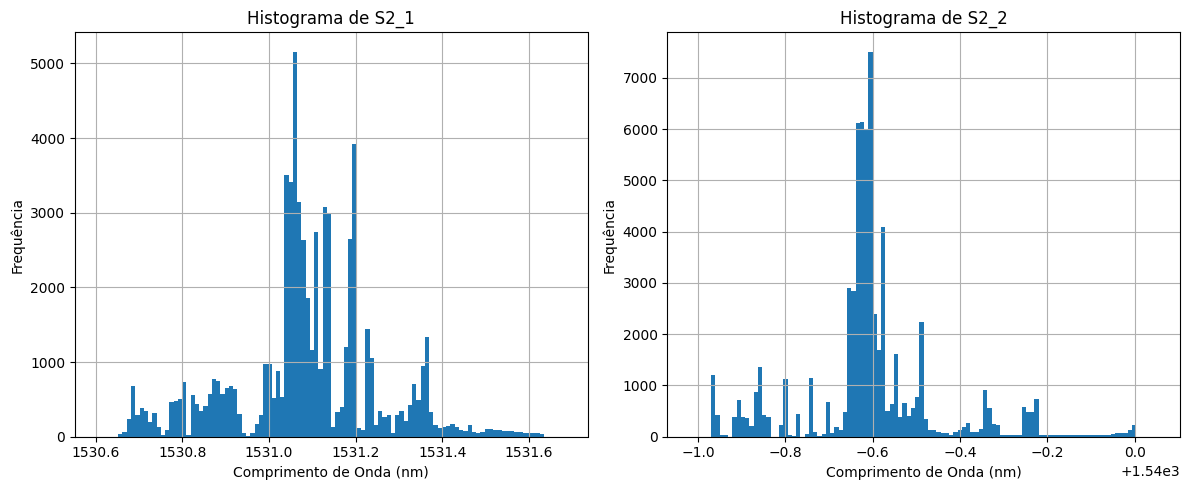

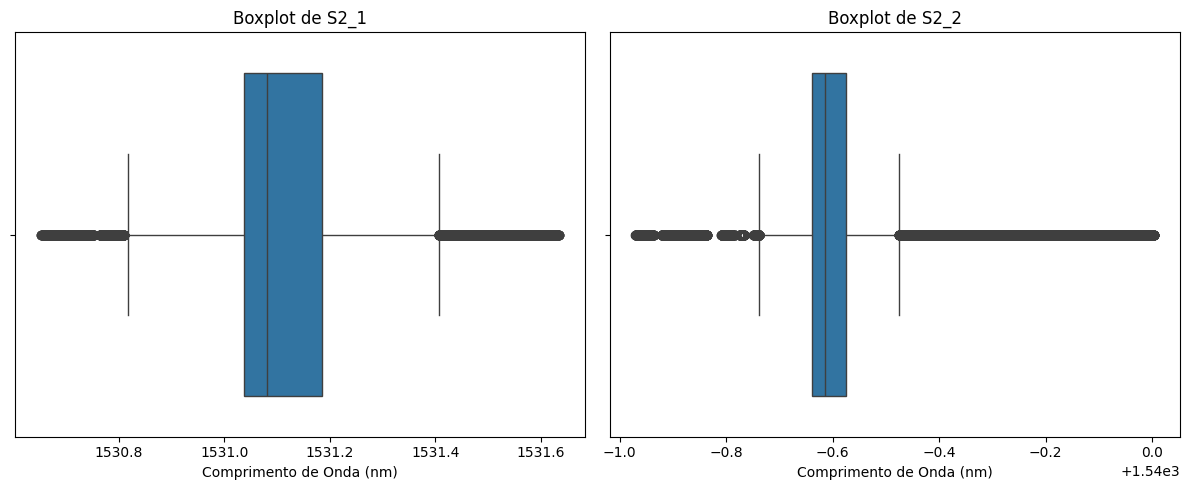

In [60]:
# Histogramas para sensores S2 (pressão)
s2_sensors = ['S2_1', 'S2_2']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, sensor in enumerate(s2_sensors):
    df[sensor].hist(ax=axes[i], bins=100)
    axes[i].set_title(f'Histograma de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')
    axes[i].set_ylabel('Frequência')
    axes[i].set_xlim(df[sensor].min() - 0.1, df[sensor].max() + 0.1)

plt.tight_layout()
plt.show()

# Boxplots para sensores S2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, sensor in enumerate(s2_sensors):
    sns.boxplot(data=df, x=sensor, ax=axes[i])
    axes[i].set_title(f'Boxplot de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')

plt.tight_layout()
plt.show()

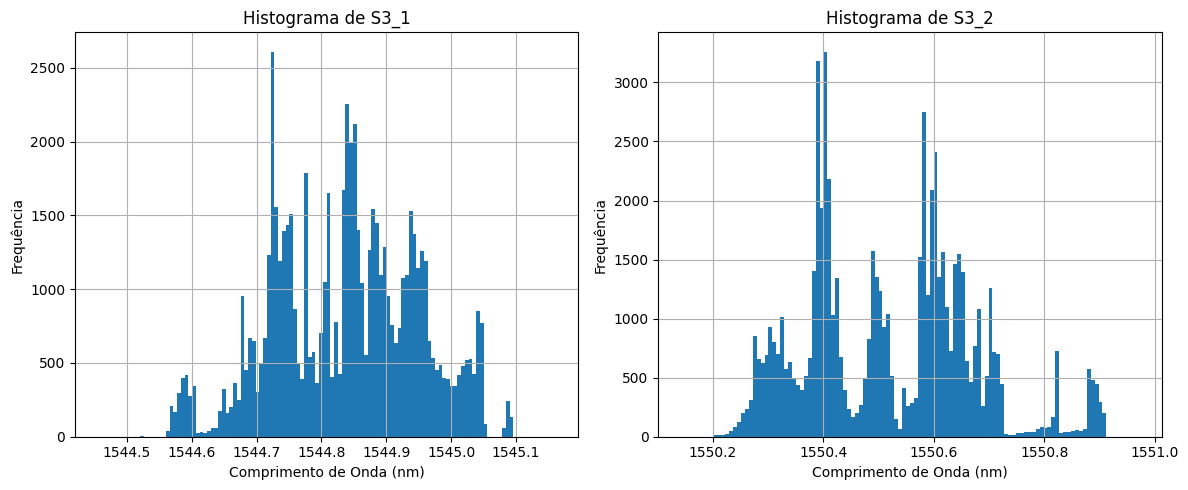

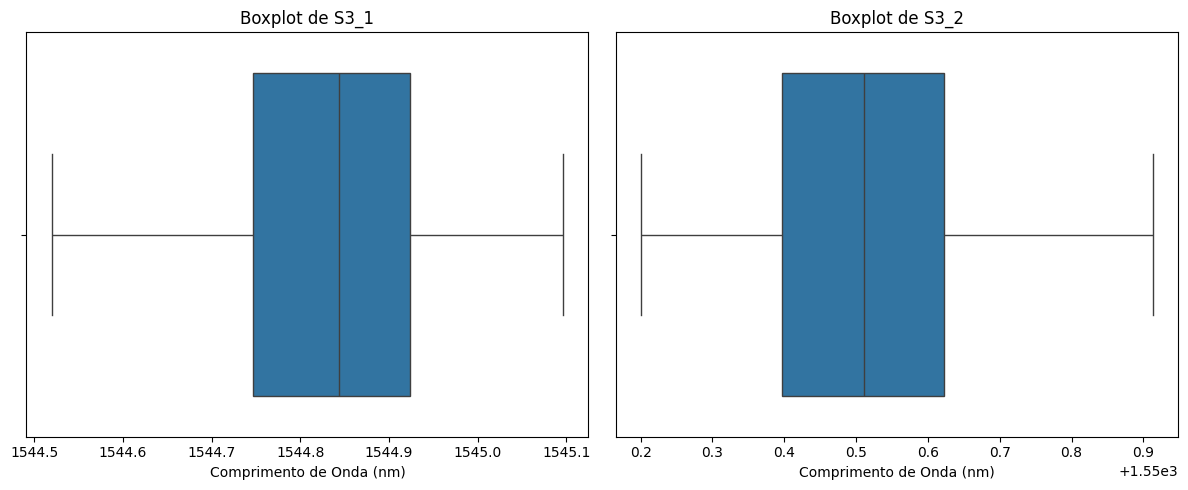

In [61]:
# Histogramas para sensores S3
s3_sensors = ['S3_1', 'S3_2']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, sensor in enumerate(s3_sensors):
    df[sensor].hist(ax=axes[i], bins=100)
    axes[i].set_title(f'Histograma de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')
    axes[i].set_ylabel('Frequência')
    axes[i].set_xlim(df[sensor].min() - 0.1, df[sensor].max() + 0.1)

plt.tight_layout()
plt.show()

# Boxplots para sensores S3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, sensor in enumerate(s3_sensors):
    sns.boxplot(data=df, x=sensor, ax=axes[i])
    axes[i].set_title(f'Boxplot de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')

plt.tight_layout()
plt.show()

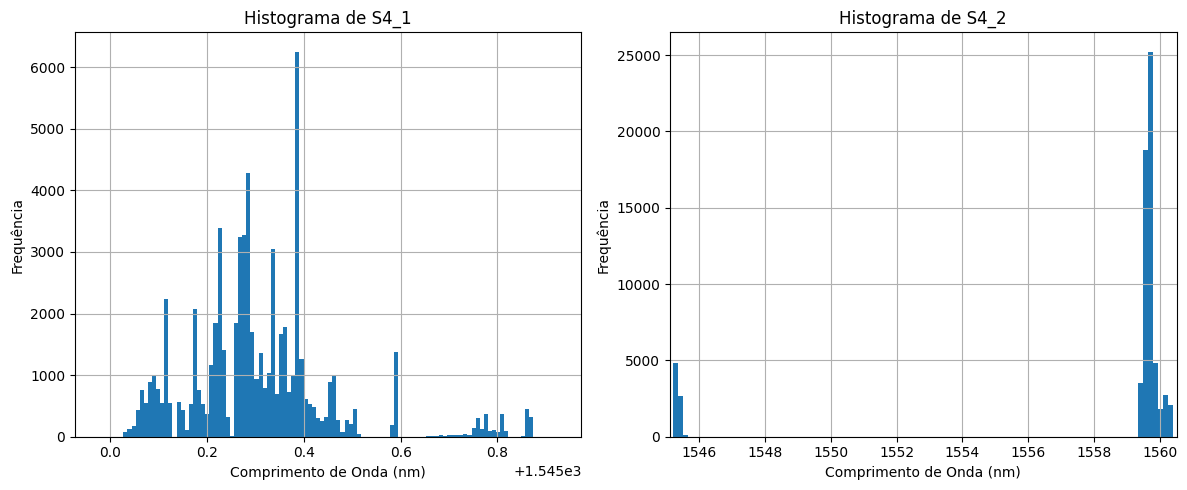

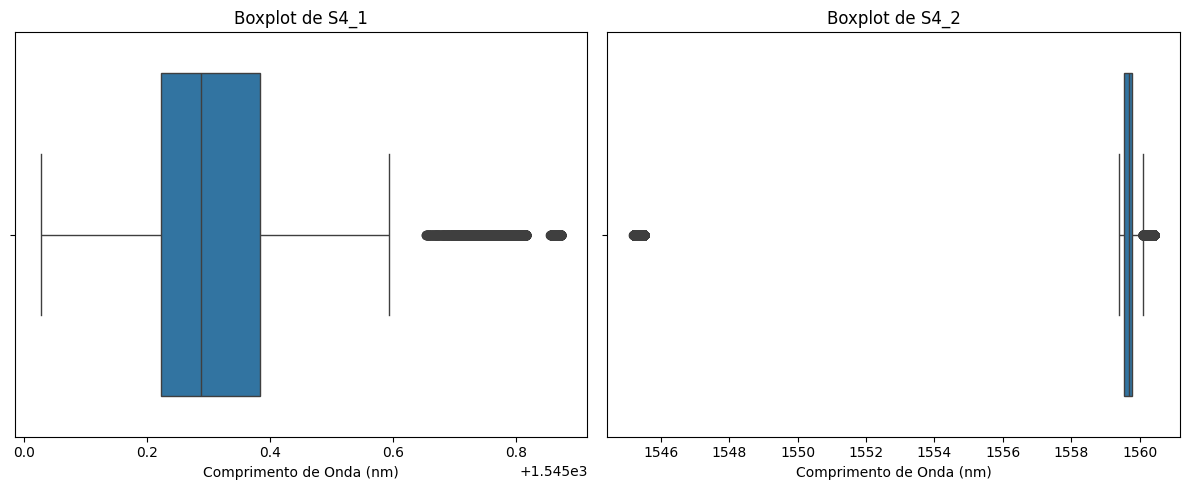

In [62]:
# Histogramas para sensores S4
s4_sensors = ['S4_1', 'S4_2']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, sensor in enumerate(s4_sensors):
    df[sensor].hist(ax=axes[i], bins=100)
    axes[i].set_title(f'Histograma de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')
    axes[i].set_ylabel('Frequência')
    axes[i].set_xlim(df[sensor].min() - 0.1, df[sensor].max() + 0.1)

plt.tight_layout()
plt.show()

# Boxplots para sensores S4
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, sensor in enumerate(s4_sensors):
    sns.boxplot(data=df, x=sensor, ax=axes[i])
    axes[i].set_title(f'Boxplot de {sensor}')
    axes[i].set_xlabel('Comprimento de Onda (nm)')

plt.tight_layout()
plt.show()

### Etapa 5: Correlação entre sensores

#### O mapa de calor de correlação mostra como os sensores se relacionam entre si. Isso pode indicar sensores redundantes ou grupos de sensores que respondem de forma semelhante.

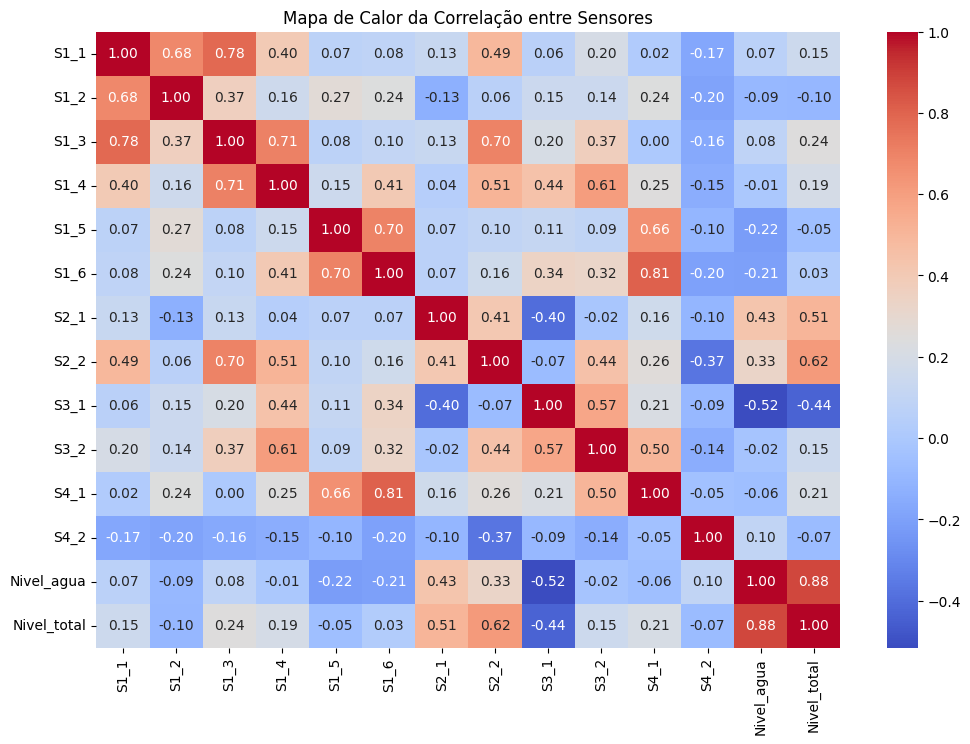

In [63]:
# Mapa de calor da correlação entre os sensores sem o campo timestamp

coluns = df.columns.tolist()
coluns.remove('Timestamp')
plt.figure(figsize=(12, 8))
correlation_matrix = df[coluns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor da Correlação entre Sensores')
plt.show()



### Etapa 6: Análise temporal

#### Gráficos temporais mostram como cada sensor varia ao longo do tempo (ou ordem de coleta). Isso permite identificar tendências, padrões ou períodos de estabilidade/variação.

/tmp/ipykernel_7541/2114826415.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


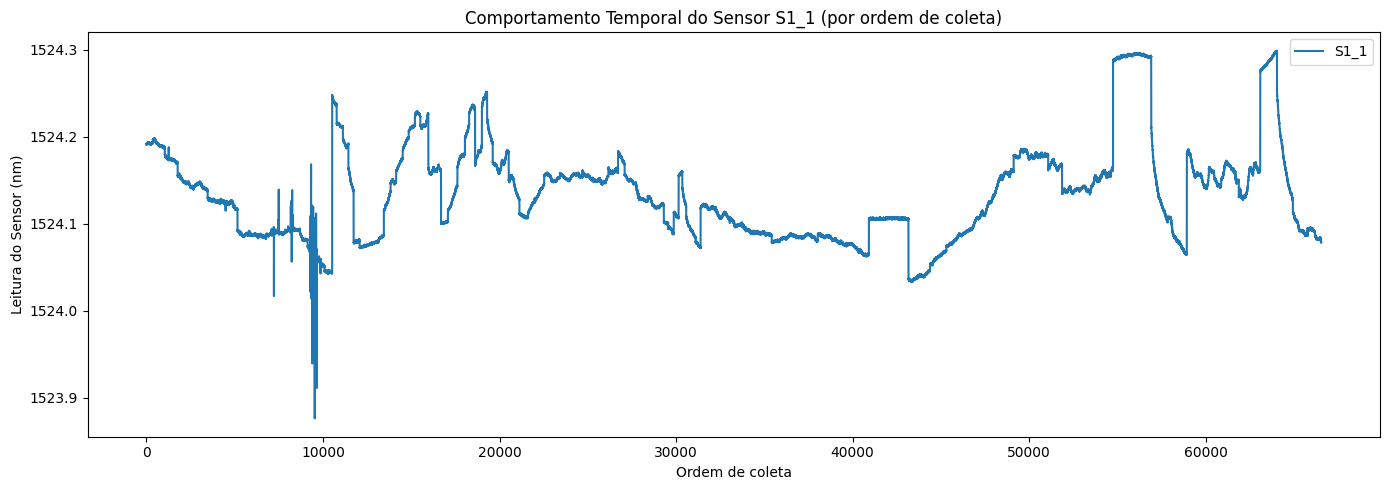

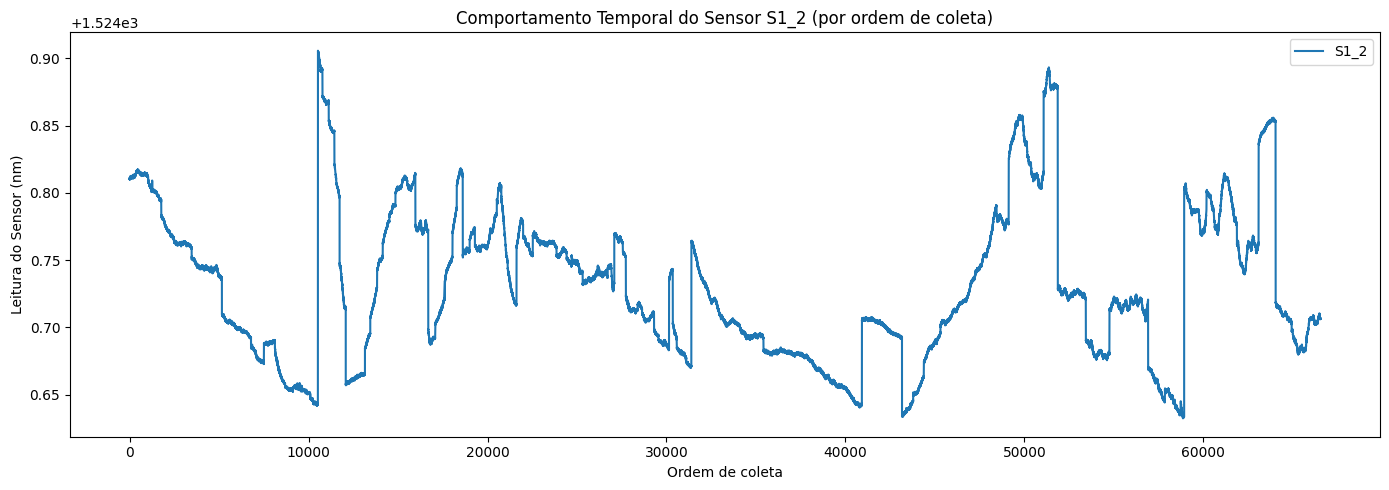

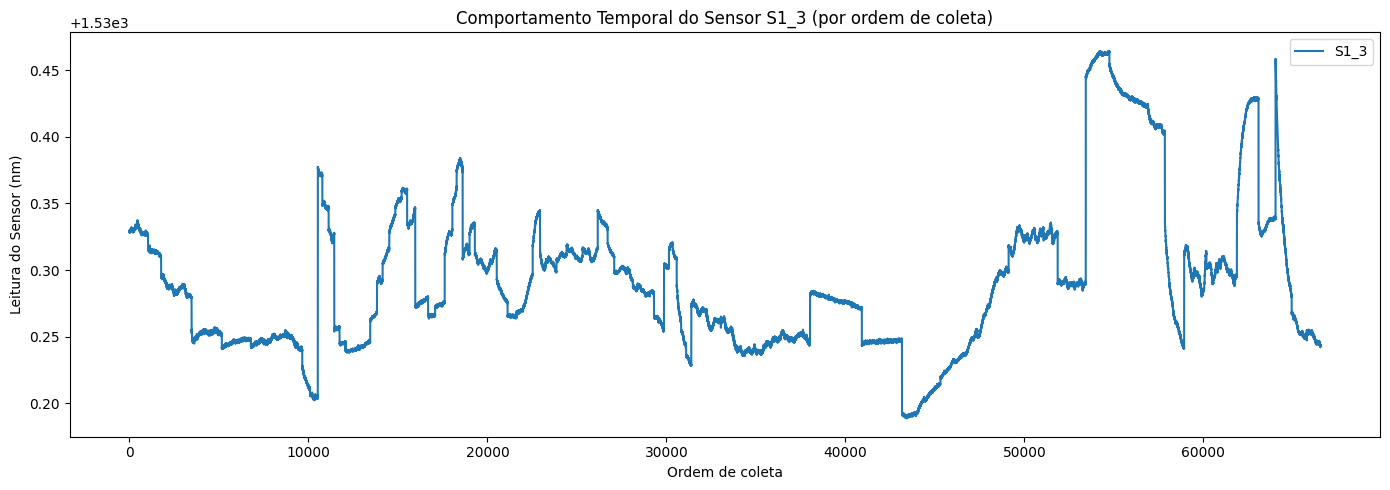

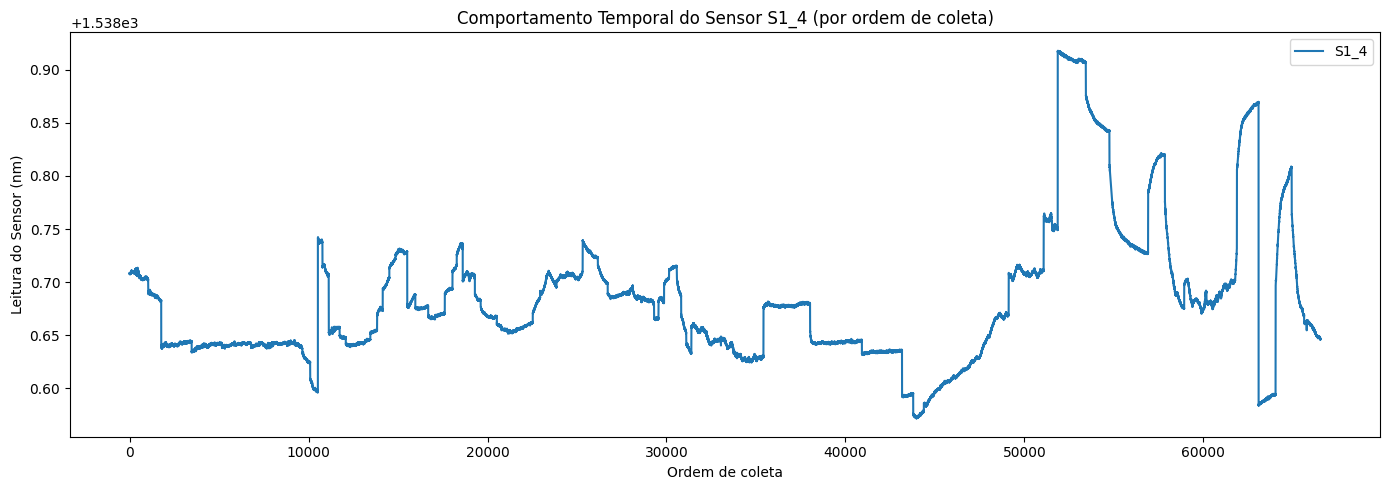

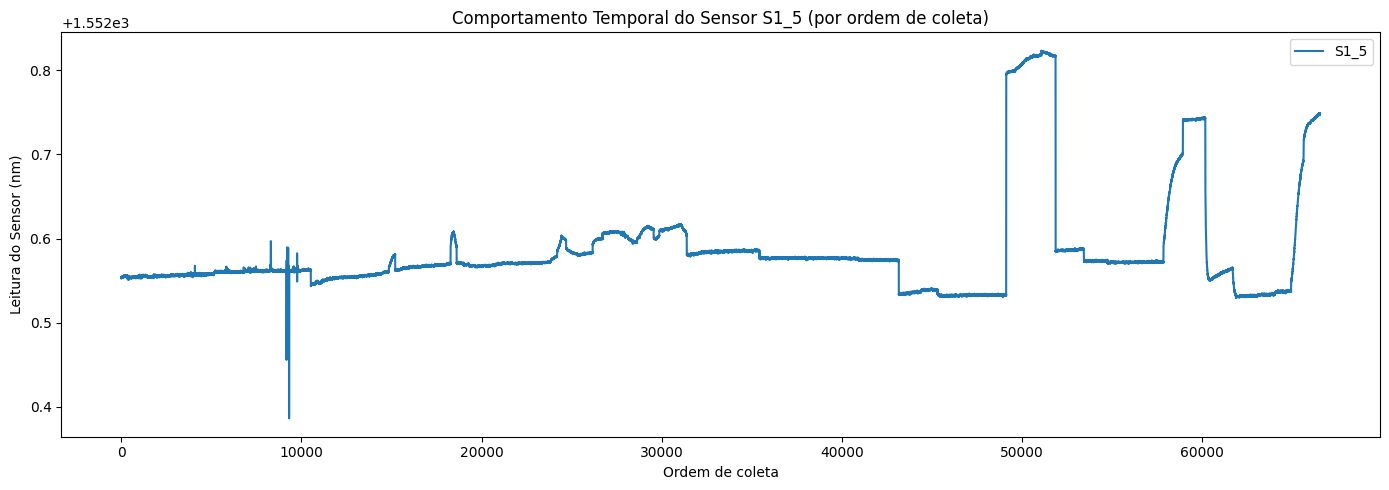

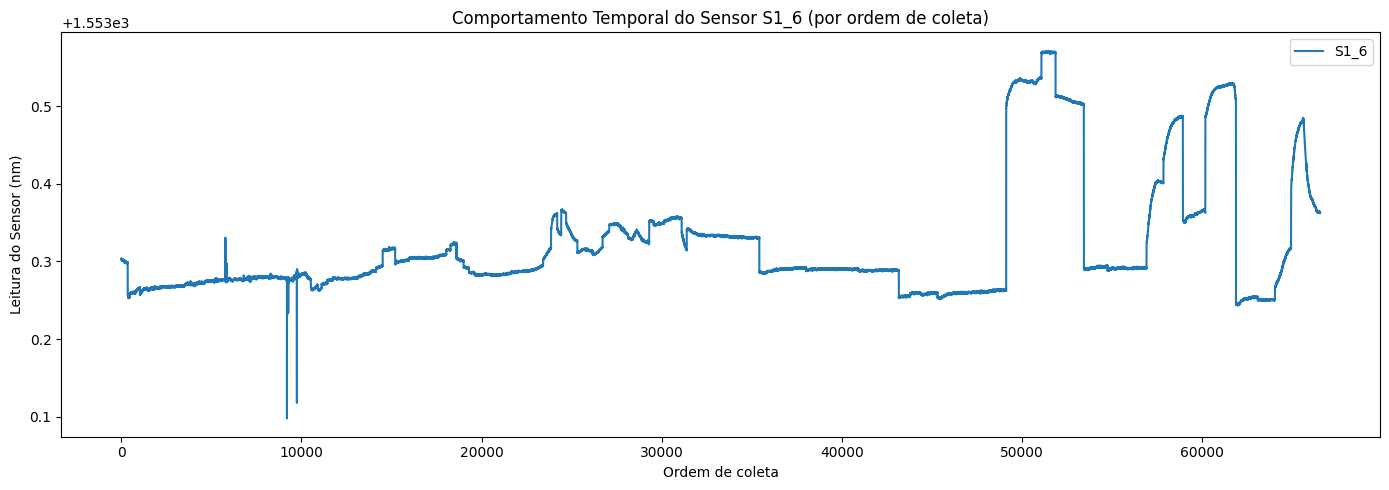

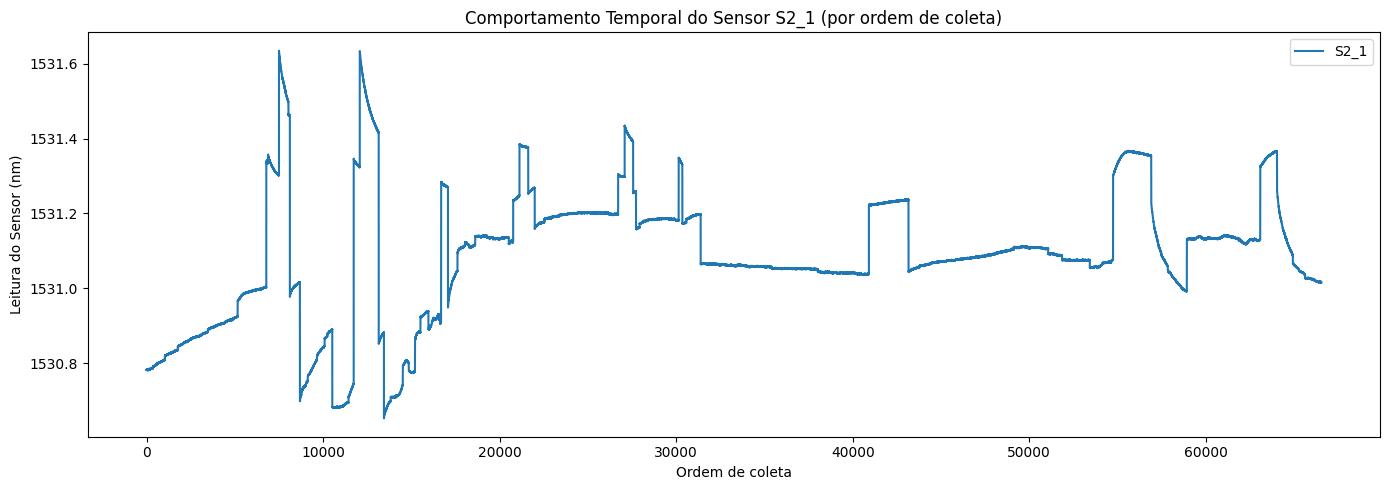

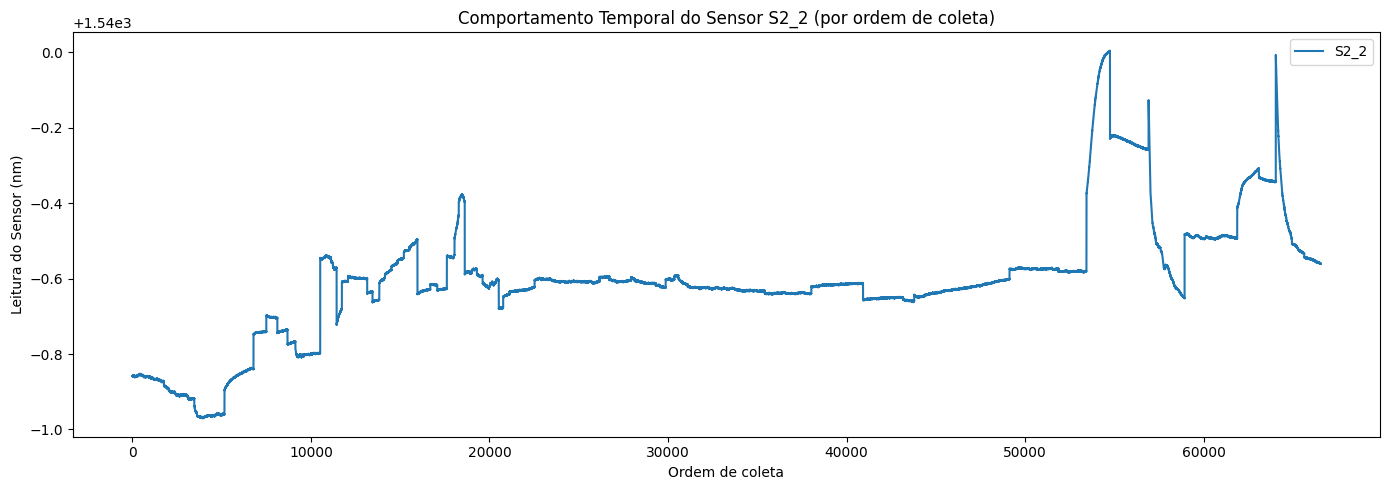

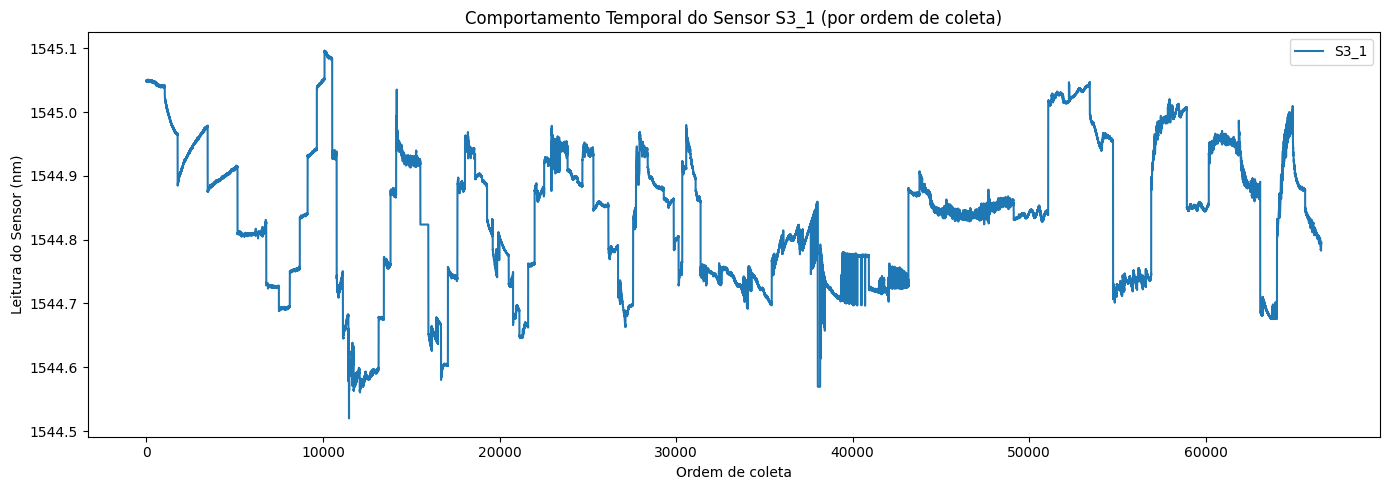

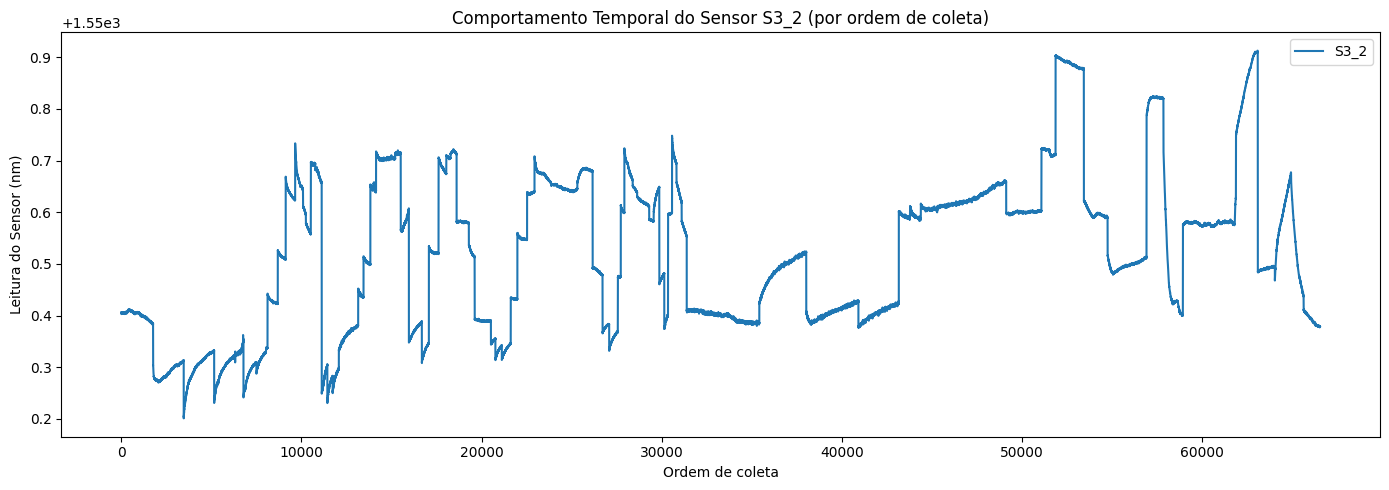

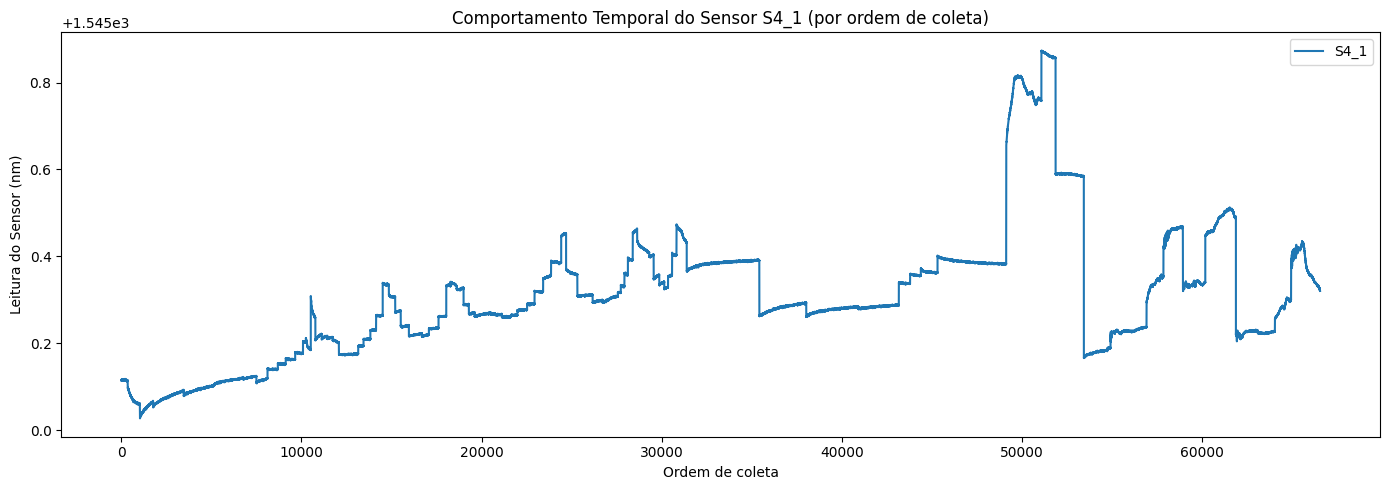

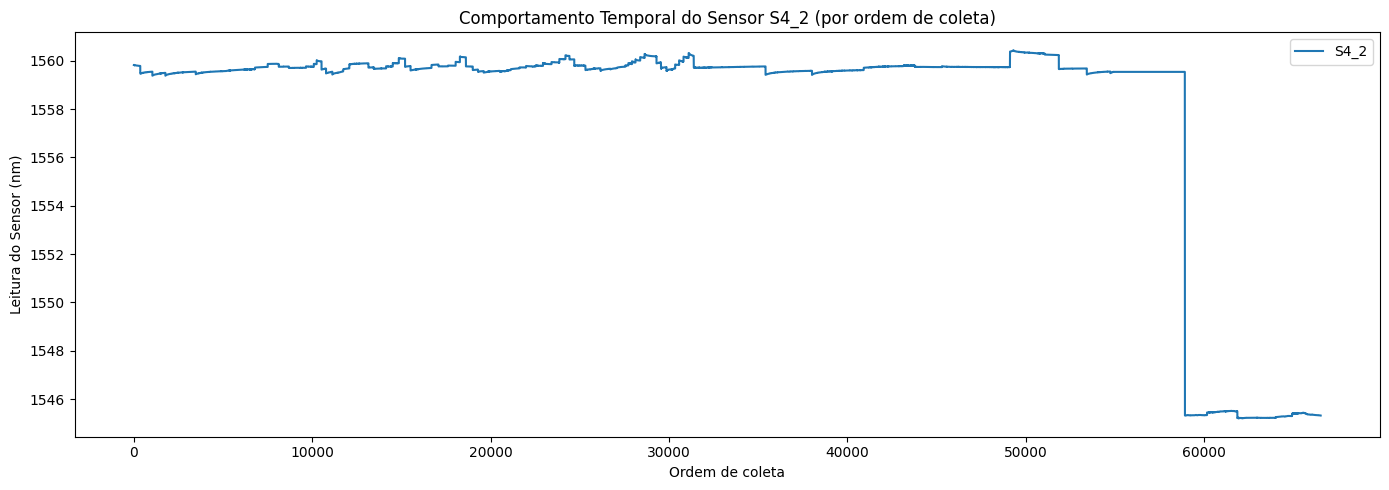

In [64]:
# Ordena o dataframe por Timestamp (caso não esteja)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Plotando por ordem de coleta (index do dataframe)
sensores = ['S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6', 
            'S2_1', 'S2_2', 'S3_1', 'S3_2', 'S4_1', 'S4_2']
for sensor in sensores:
  plt.figure(figsize=(14, 5))
  plt.plot(df.index, df[sensor], label=sensor)
  plt.xlabel('Ordem de coleta')
  plt.ylabel('Leitura do Sensor (nm)')
  plt.title(f'Comportamento Temporal do Sensor {sensor} (por ordem de coleta)')
  plt.legend()
  plt.tight_layout()
  plt.show()


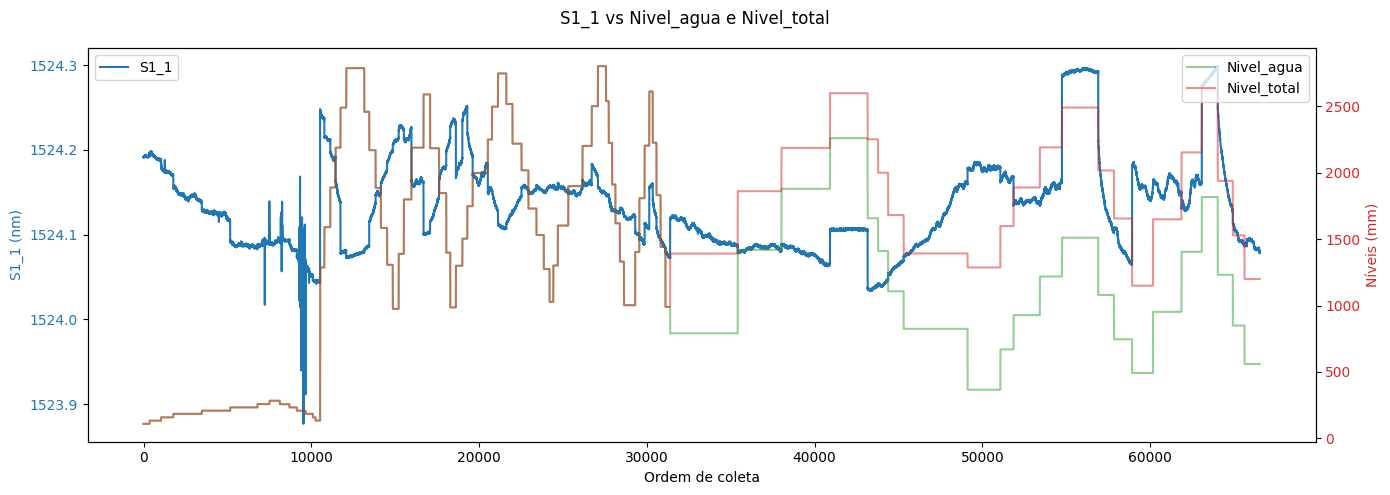

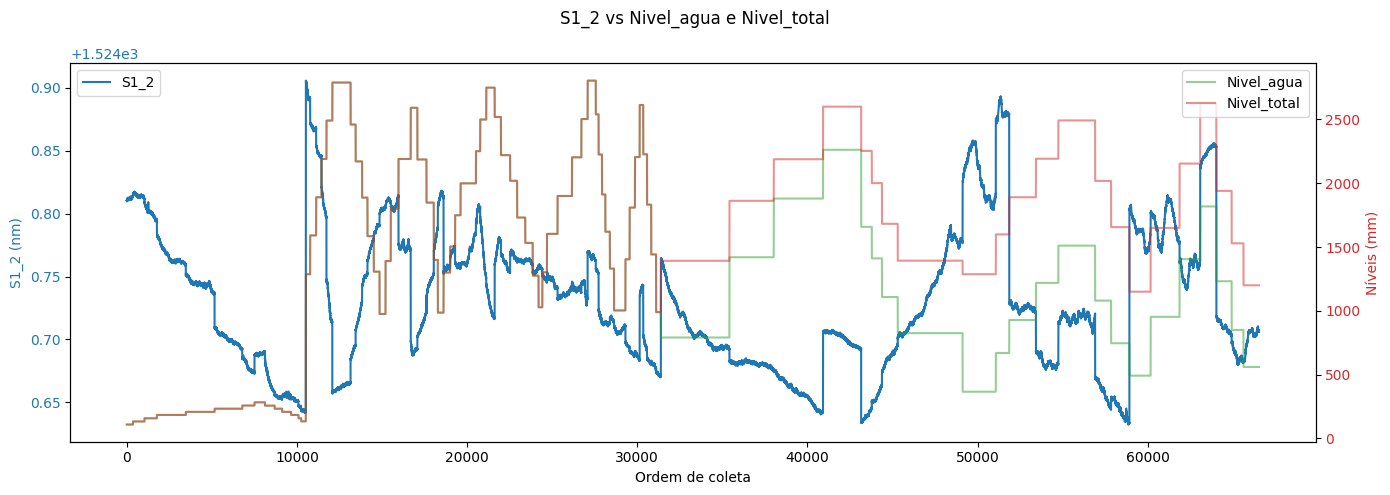

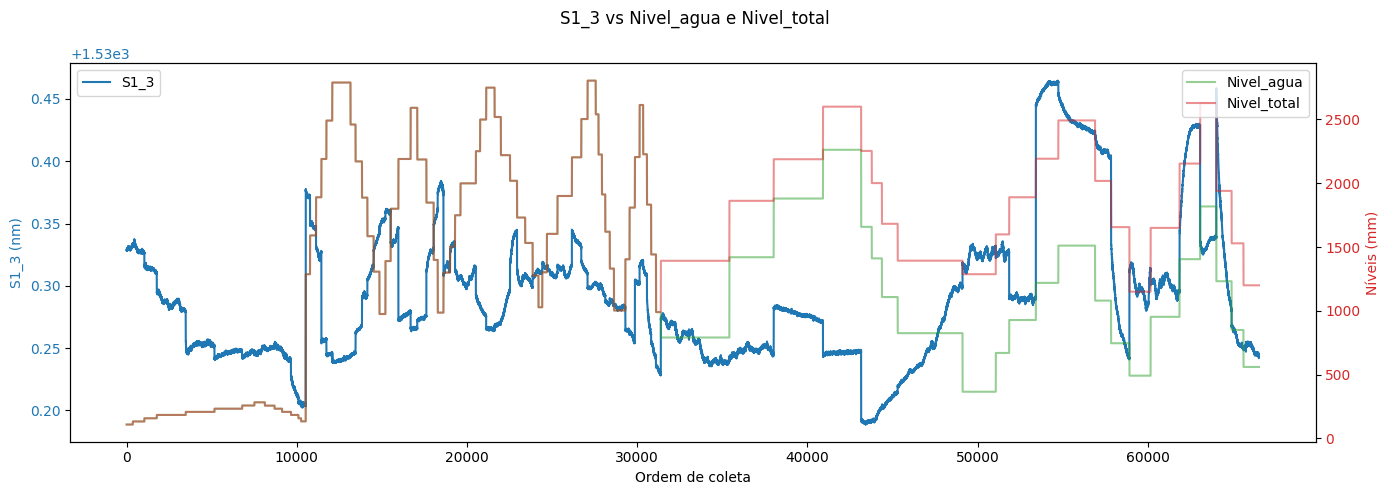

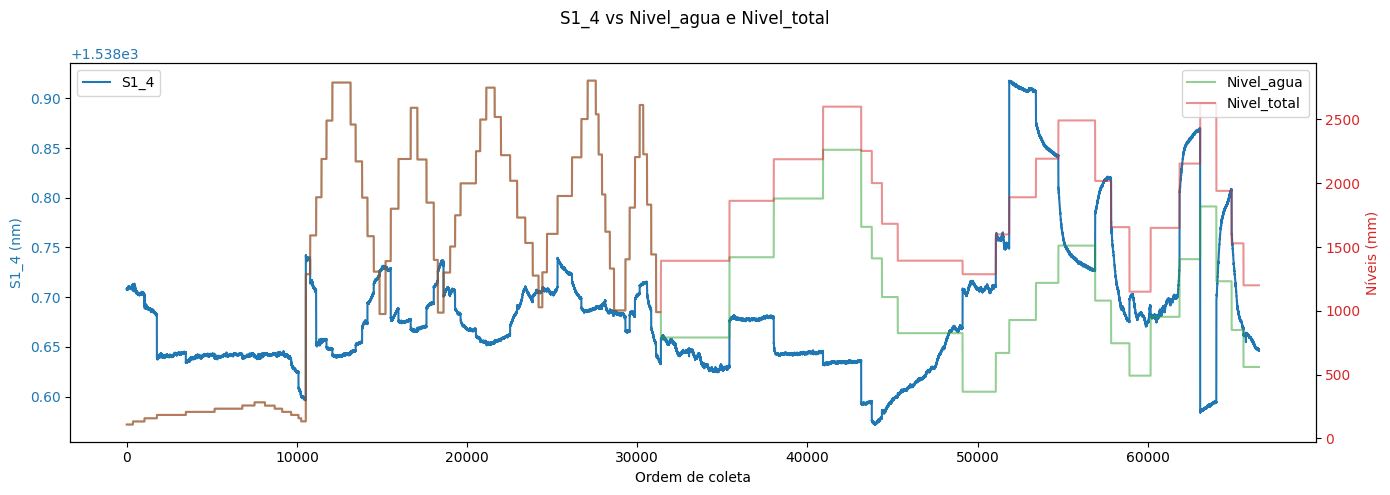

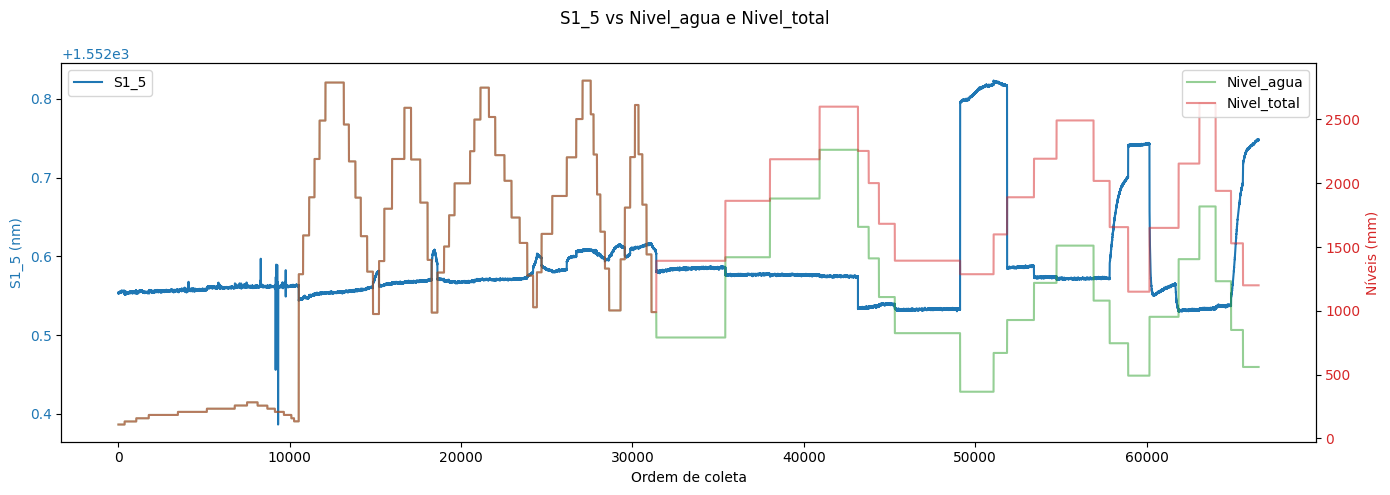

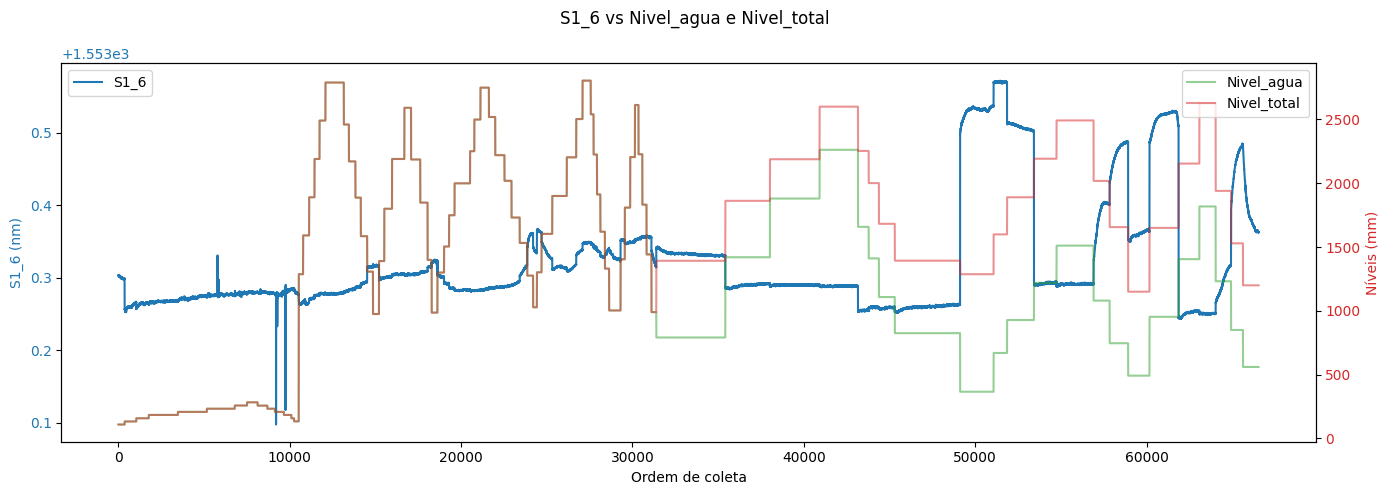

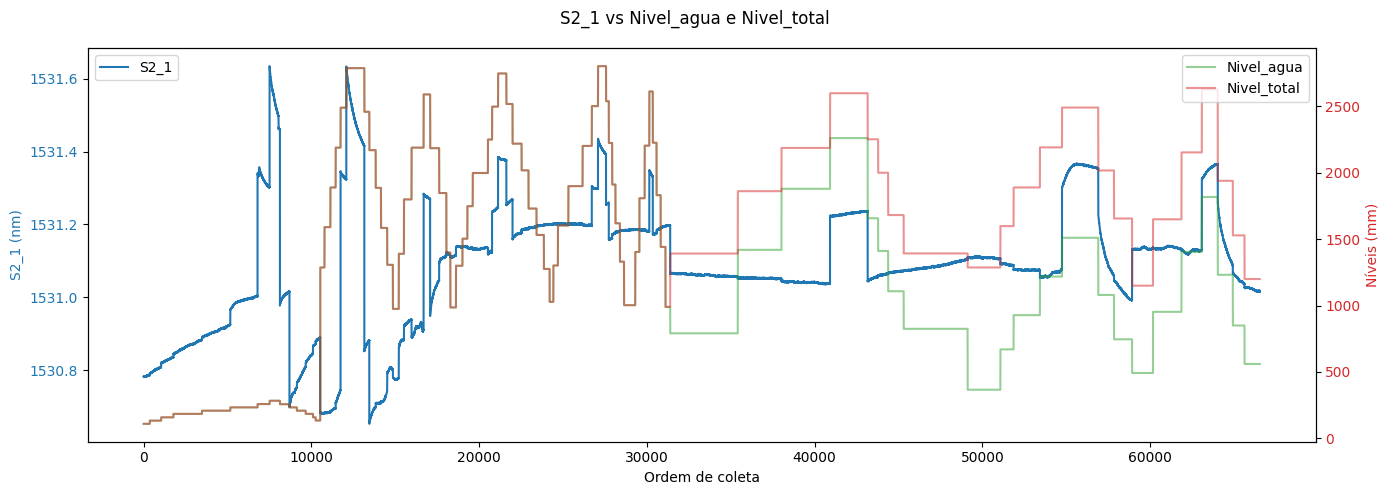

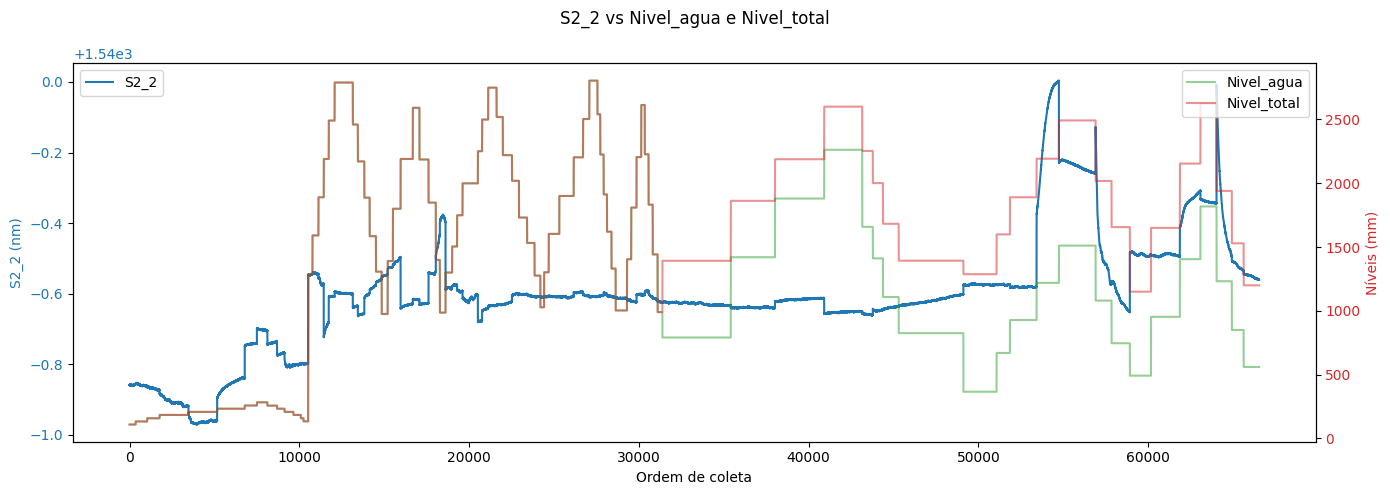

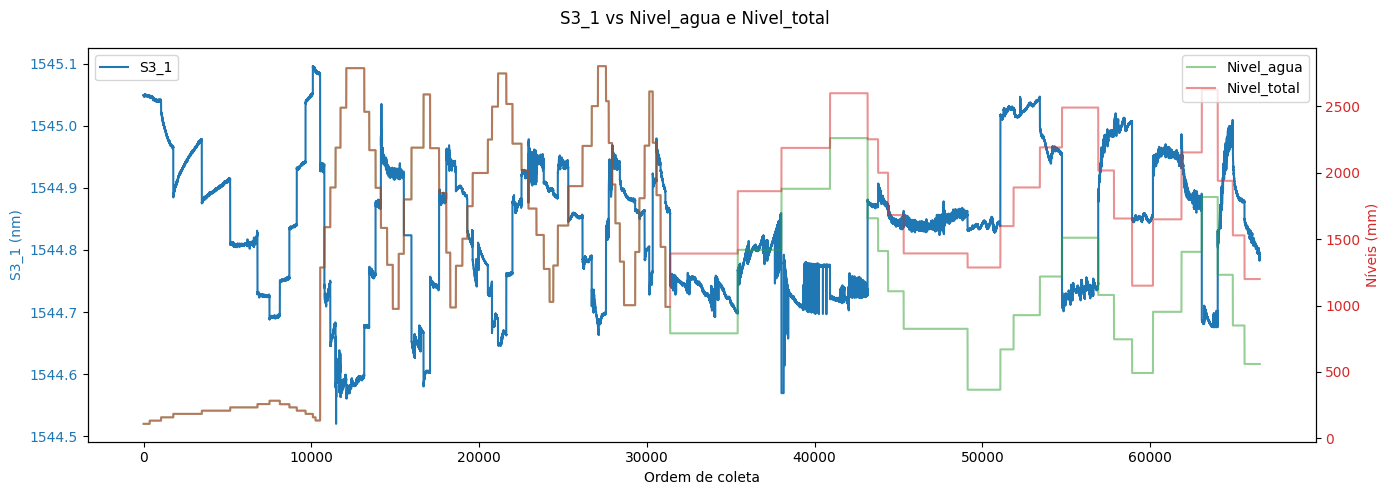

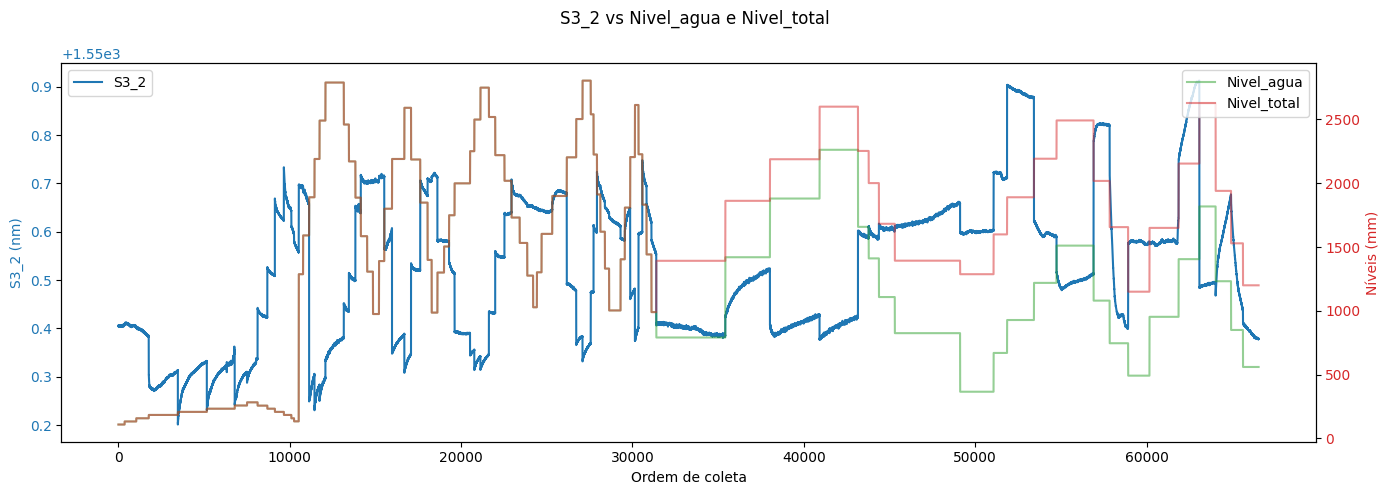

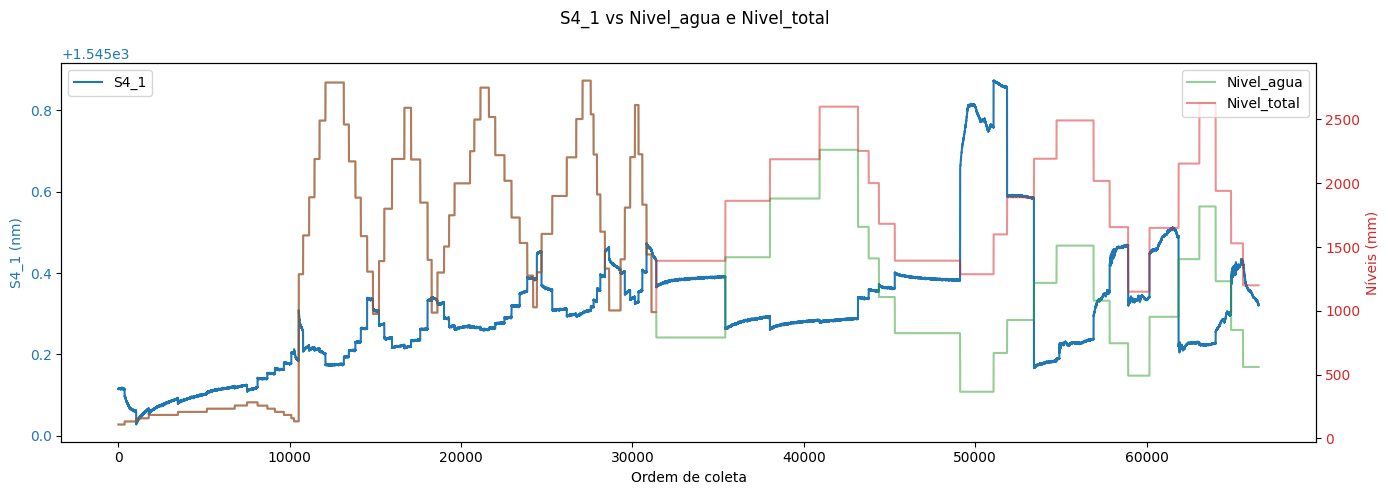

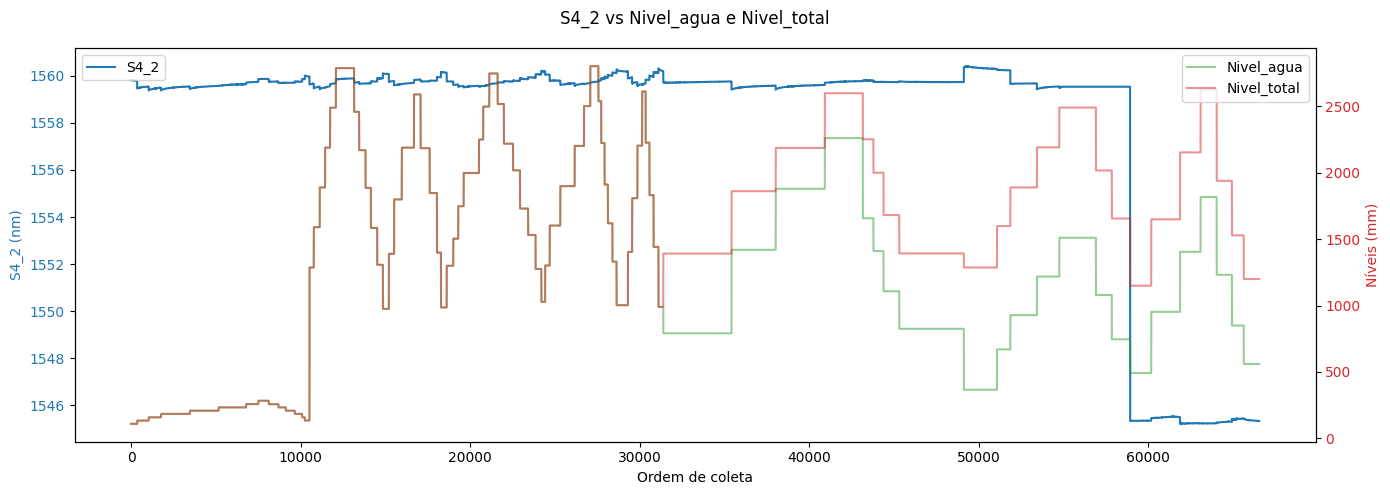

In [65]:
# Plota cada sensor junto com Nivel_agua e Nivel_total (por ordem de coleta)
sensores = ['S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6', 
            'S2_1', 'S2_2', 'S3_1', 'S3_2', 'S4_1', 'S4_2']

for sensor in sensores:
    fig, ax1 = plt.subplots(figsize=(14, 5))
    ax1.plot(df.index, df[sensor], color='tab:blue', label=sensor)
    ax1.set_xlabel('Ordem de coleta')
    ax1.set_ylabel(f'{sensor} (nm)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(df.index, df['Nivel_agua'], color='tab:green', alpha=0.5, label='Nivel_agua')
    ax2.plot(df.index, df['Nivel_total'], color='tab:red', alpha=0.5, label='Nivel_total')
    ax2.set_ylabel('Níveis (mm)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.suptitle(f'{sensor} vs Nivel_agua e Nivel_total')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

### Etapa 7: Relação com as variáveis-alvo

#### Scatterplots entre sensores e os níveis (Nivel_agua e Nivel_total) ajudam a visualizar se existe relação direta entre as leituras dos sensores e os níveis do tanque, facilitando a identificação de sensores mais sensíveis às variações dos níveis.

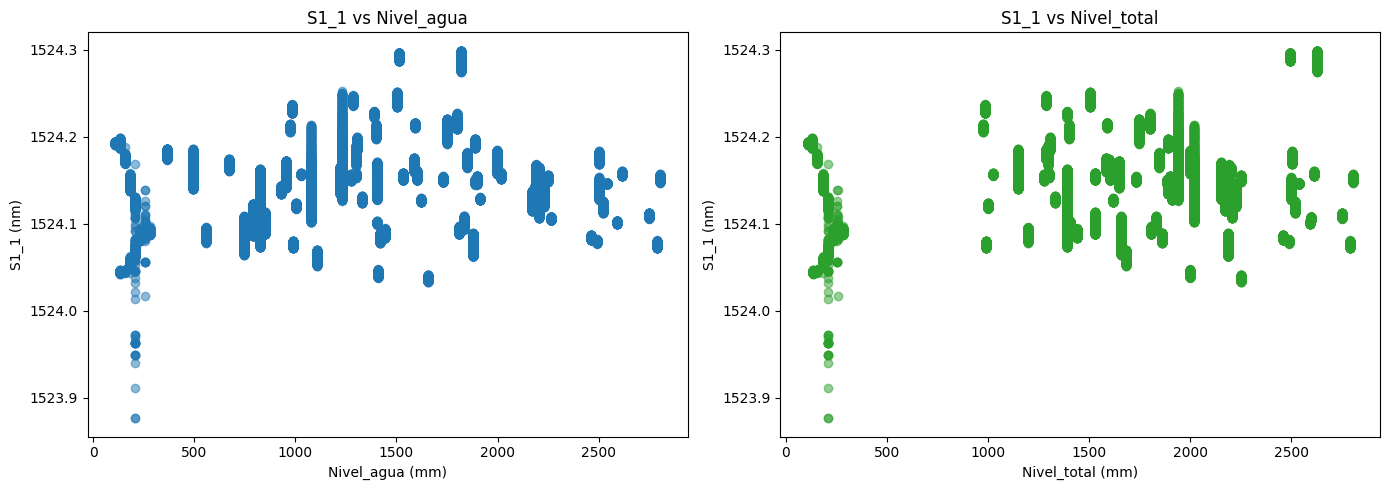

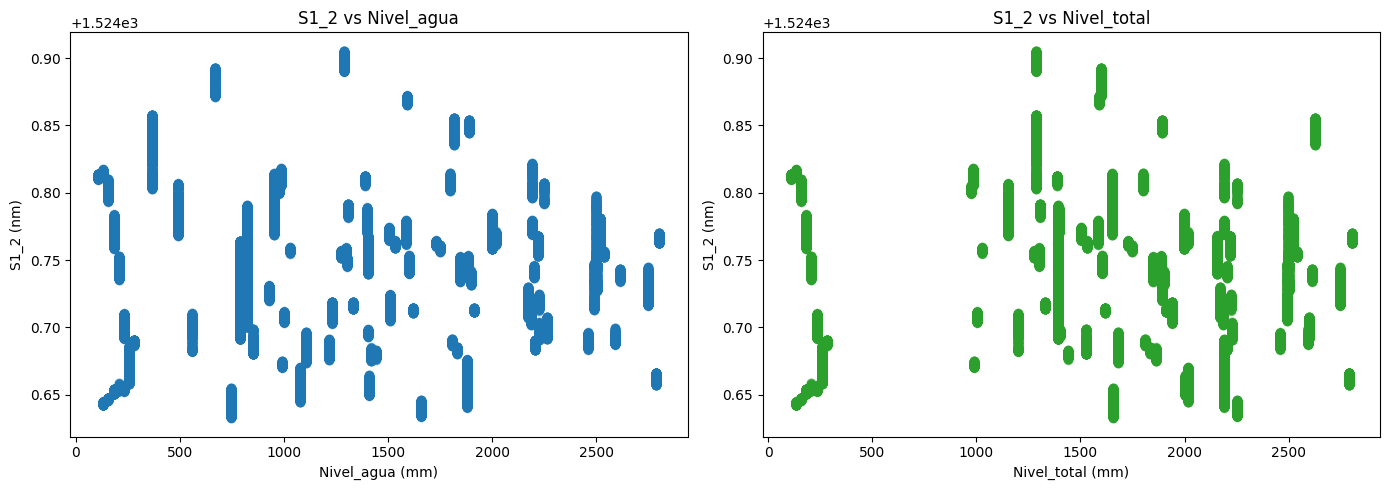

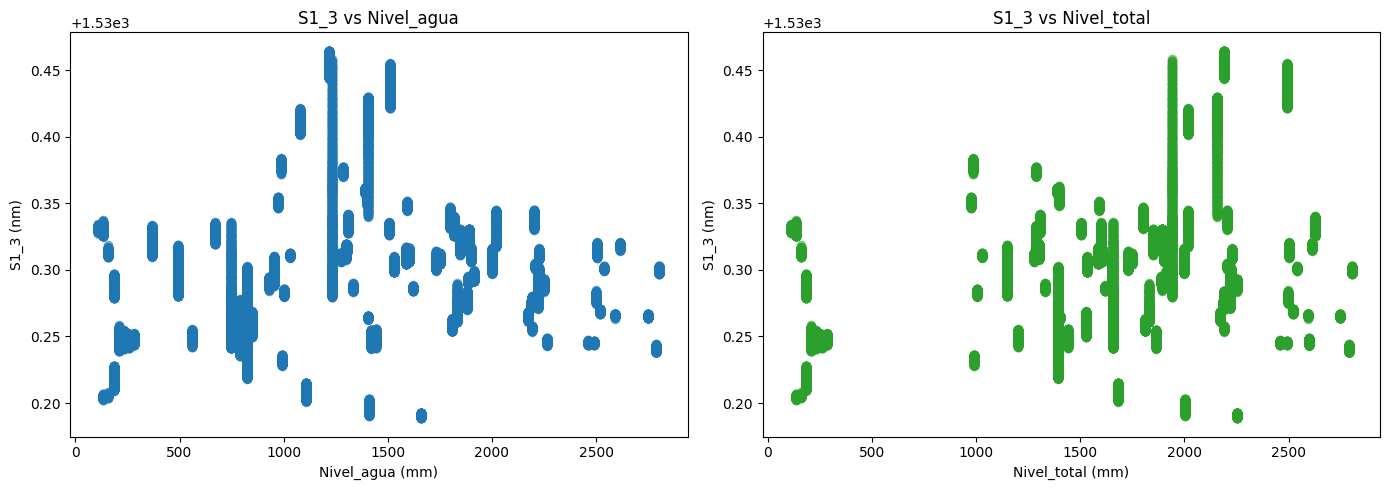

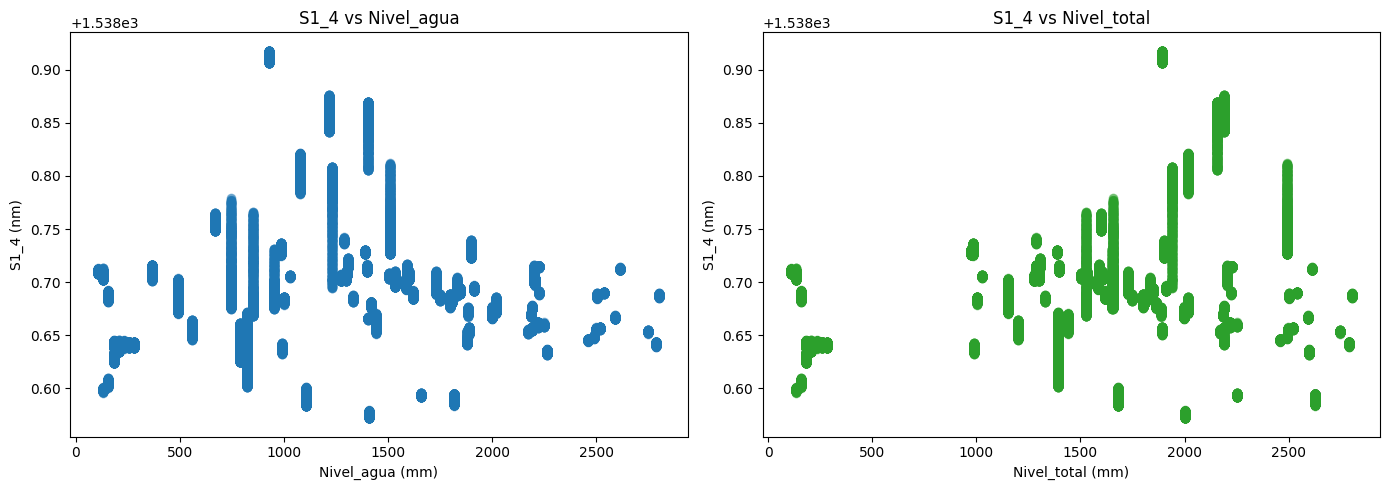

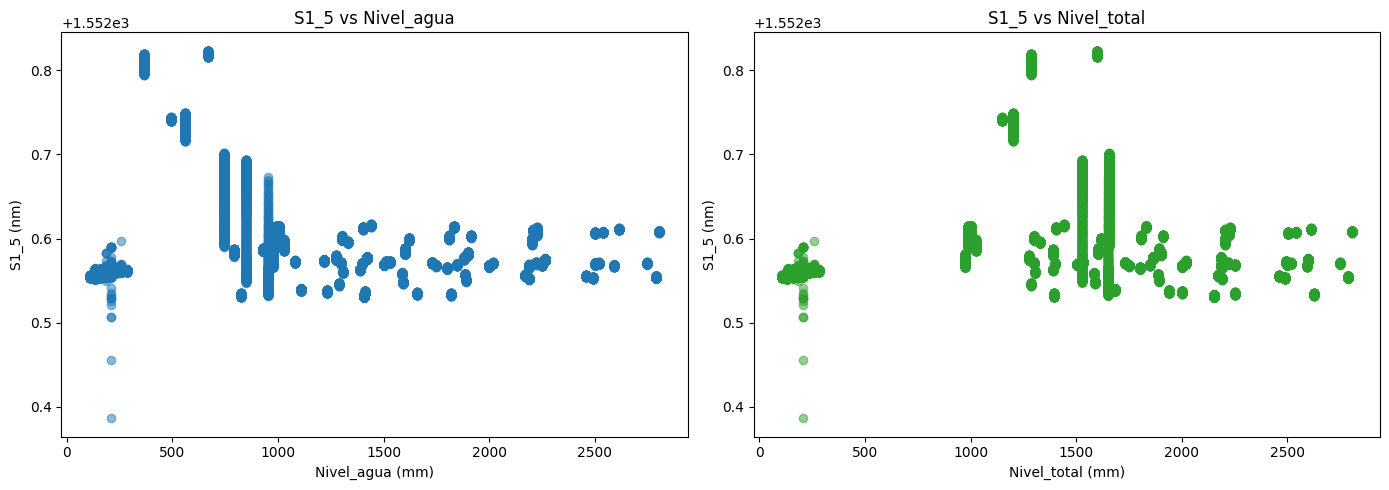

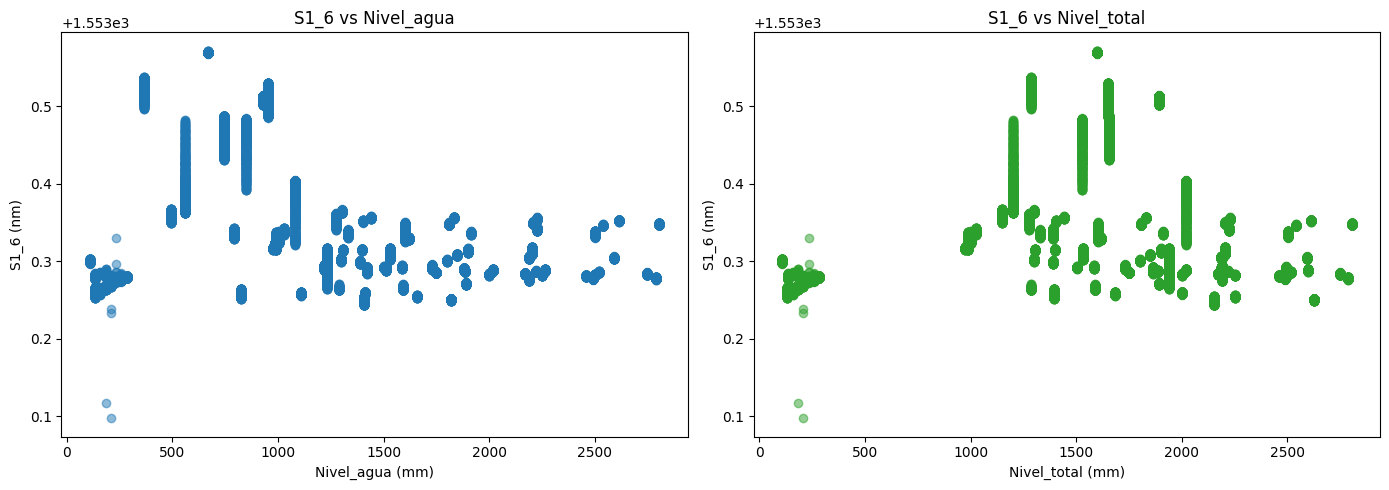

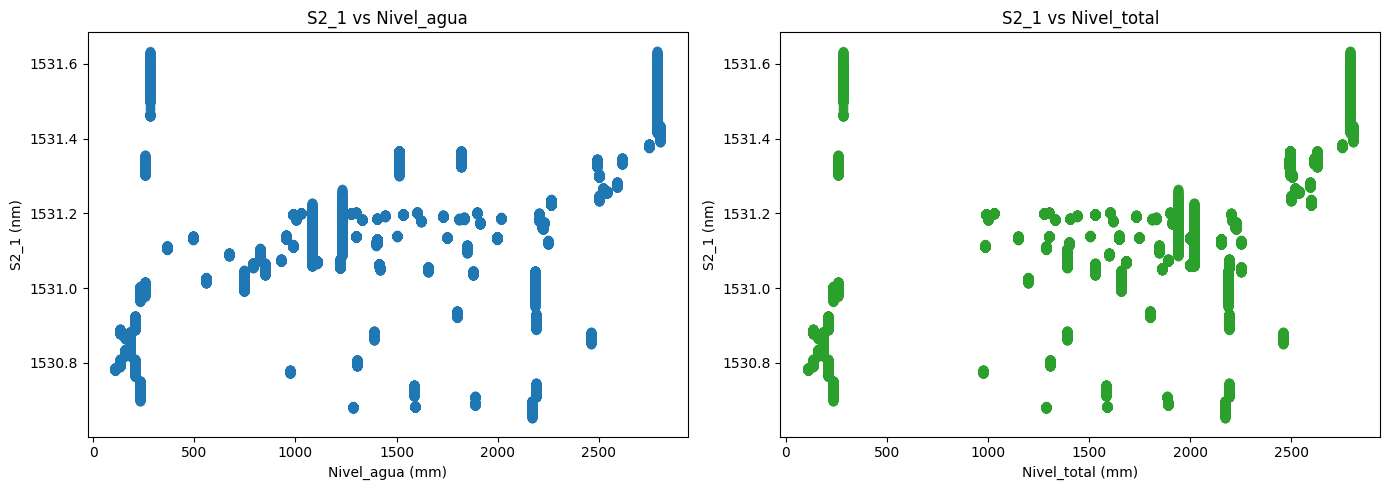

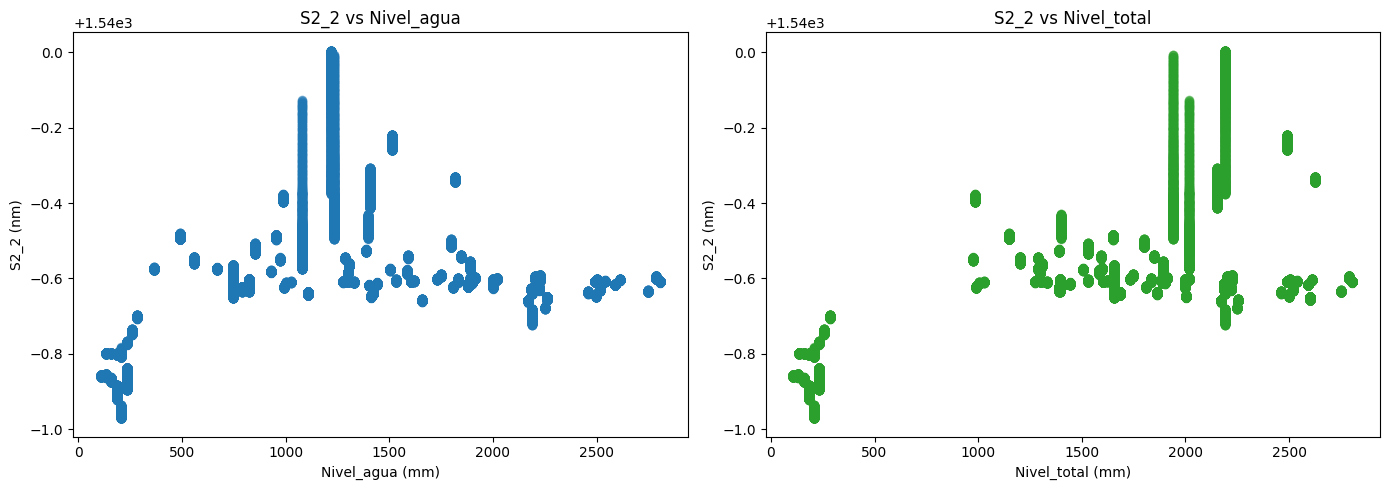

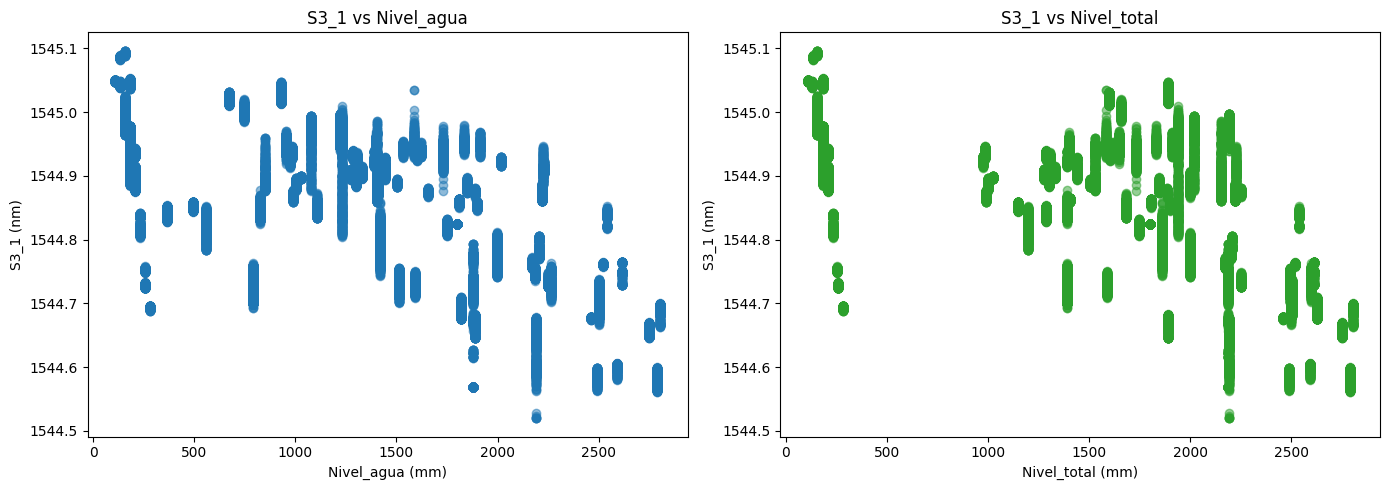

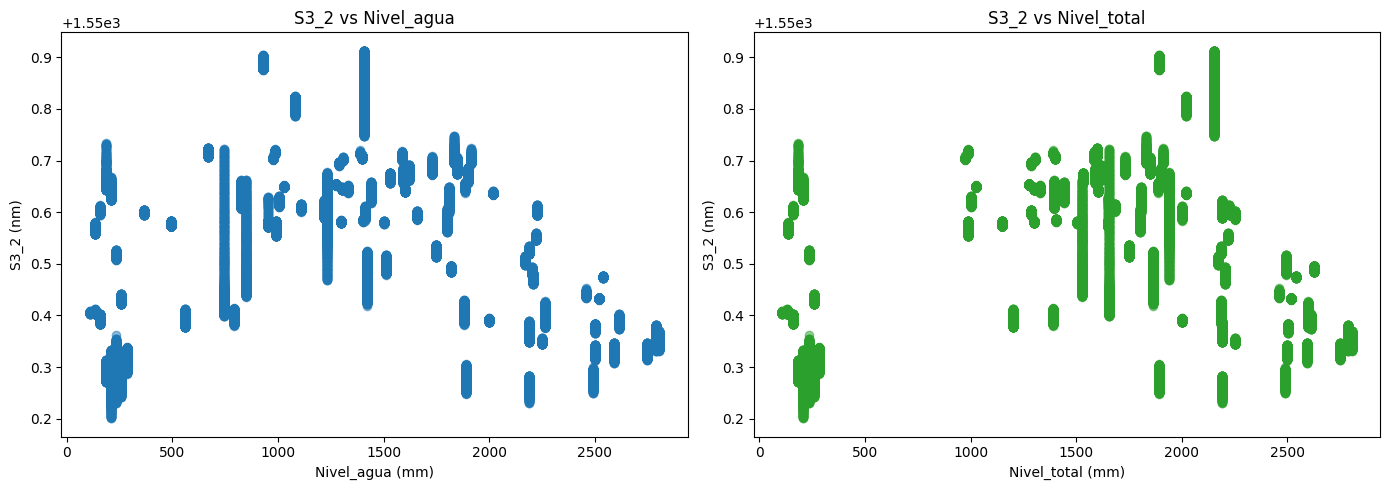

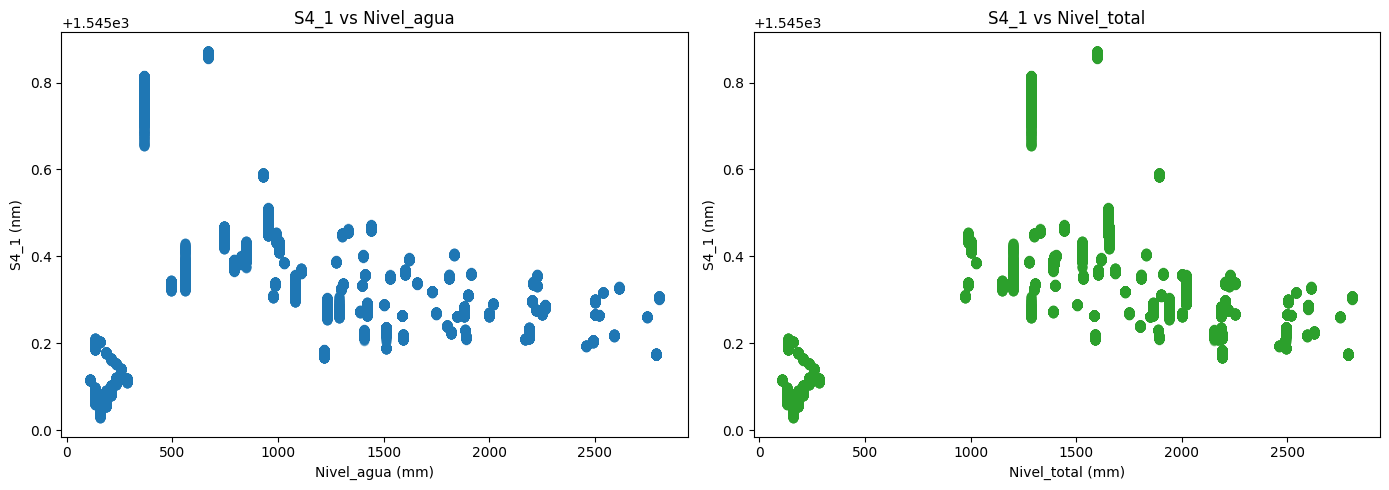

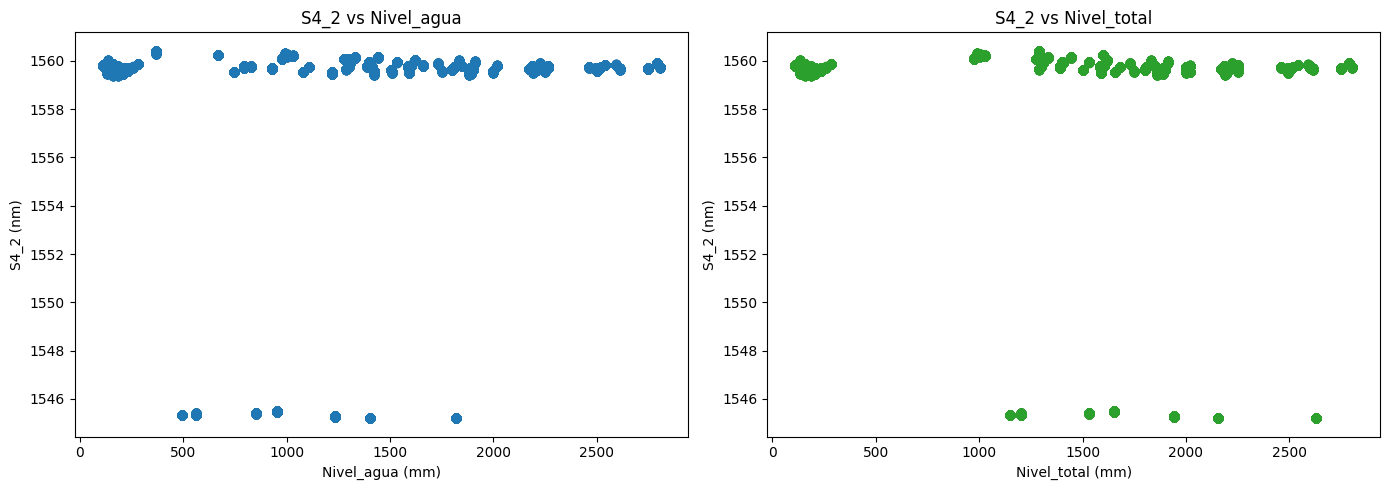

In [66]:
# Scatterplots entre sensores e Nivel_agua / Nivel_total

sensores = ['S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6', 
            'S2_1', 'S2_2', 'S3_1', 'S3_2', 'S4_1', 'S4_2']

for sensor in sensores:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Sensor vs Nivel_agua
    axes[0].scatter(df['Nivel_agua'], df[sensor], alpha=0.5, color='tab:blue')
    axes[0].set_xlabel('Nivel_agua (mm)')
    axes[0].set_ylabel(f'{sensor} (nm)')
    axes[0].set_title(f'{sensor} vs Nivel_agua')
    
    # Sensor vs Nivel_total
    axes[1].scatter(df['Nivel_total'], df[sensor], alpha=0.5, color='tab:green')
    axes[1].set_xlabel('Nivel_total (mm)')
    axes[1].set_ylabel(f'{sensor} (nm)')
    axes[1].set_title(f'{sensor} vs Nivel_total')
    
    plt.tight_layout()
    plt.show()

## Resumo final

Resumo das Etapas da Análise Exploratória

O código foi estruturado e comentado, utilizando diversos tipos de gráficos (histogramas, boxplots, séries temporais, scatterplots e heatmaps) para explorar os dados. Cada etapa foi acompanhada de análises textuais, interpretando os resultados de forma objetiva.

Durante a análise, observamos que não há valores ausentes ou duplicados, portanto, não será necessário tratamento para esses casos. Os boxplots revelaram a presença de outliers em vários sensores, especialmente no sensor S4_2, que apresentou valores extremamente discrepantes e possivelmente indica falha na coleta. Esse tipo de outlier deverá ser removido nas próximas etapas de tratamento de dados.

Os sensores de temperatura (S1) mostraram alta correlação entre si, sugerindo comportamento semelhante ou possível redundância. Os gráficos temporais e de dispersão também evidenciaram padrões consistentes entre sensores e níveis do tanque.

Em resumo, os principais padrões encontrados foram a forte correlação entre sensores de temperatura e a identificação de outliers, especialmente em S4_2. Não foram detectados problemas de valores ausentes ou duplicados. As próximas etapas devem focar na remoção de outliers e na avaliação da utilidade de sensores altamente correlacionados ou com falhas. Essas hipóteses orientarão o tratamento dos dados e possíveis ajustes no conjunto de

In [67]:
# Contagem de outliers pelo método do IQR para cada sensor
sensores = ['S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6',
            'S2_1', 'S2_2', 'S3_1', 'S3_2', 'S4_1', 'S4_2']

outlier_counts = {}
df_sem_outliers = df.copy()

for sensor in sensores:
    Q1 = df[sensor].quantile(0.25)
    Q3 = df[sensor].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[sensor] < lower_bound) | (df[sensor] > upper_bound)]
    outlier_counts[sensor] = outliers.shape[0]
    df_sem_outliers = df_sem_outliers[(df_sem_outliers[sensor] >= lower_bound) & (df_sem_outliers[sensor] <= upper_bound)]

# Exibe a contagem de outliers por sensor
for sensor, count in outlier_counts.items():
    print(f"{sensor}: {count} outliers")


print("Shape do dataframe sem outliers:", df_sem_outliers.shape)

# Salva o novo dataframe sem outliers em um arquivo CSV
df_sem_outliers.to_csv('./data/df_full_sem_outliers.csv', index=False)

S1_1: 3132 outliers
S1_2: 464 outliers
S1_3: 4399 outliers
S1_4: 4975 outliers
S1_5: 6221 outliers
S1_6: 7884 outliers
S2_1: 6924 outliers
S2_2: 16924 outliers
S3_1: 0 outliers
S3_2: 0 outliers
S4_1: 2741 outliers
S4_2: 12451 outliers
Shape do dataframe sem outliers: (32291, 15)


In [68]:

# Seleciona apenas as colunas dos sensores
sensores = ['S1_1', 'S1_2', 'S1_3', 'S1_4', 'S1_5', 'S1_6',
            'S2_1', 'S2_2', 'S3_1', 'S3_2', 'S4_1', 'S4_2']

X = df[sensores]

# Aplica o Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_pred = lof.fit_predict(X)

# -1 indica outlier, 1 indica normal
df_lof_sem_outliers = df[outlier_pred == 1].copy()

print("Shape do dataframe sem outliers (LOF):", df_lof_sem_outliers.shape)

df_lof_sem_outliers.to_csv('./data/df_full_sem_outliers_lof.csv', index=False)

Shape do dataframe sem outliers (LOF): (63213, 15)
